In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from keras.preprocessing.text import Tokenizer
from collections import Counter 
import nltk
from nltk.corpus import stopwords

Using TensorFlow backend.


In [4]:
df = pd.read_csv("../data/Processed_TrumpTweets_Coronavirus_briefing.csv").drop(["Unnamed: 0", 'Unnamed: 0.1'], axis = 1)
df_en = df[df['language'] == 'en']

/Users/trevorcarpenter/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (1,2,3,4,5,6,9,10,12,13,14,15,16,17,21,22,23,24,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [47]:
df_en['tweet']

0          Why is she still here?🤔didn’t she say that if ...
1          “Among other developments on Saturday, US Pres...
2          Pass it on.   Only the basic human decency of ...
3          @mrmedina Trump and Abe said yes yesterday. Bu...
4          @bizshrink @GeorgeTakei Keep in mind that Trum...
                                 ...                        
1605844    What does trump have in his left ear? Hearing ...
1605845    hellp people vote  for Trump and the help  wil...
1605846    Trump dismisses the lack of test kits. Why? He...
1605847    Trump - "The testing is going very smoothly no...
1605848    "Crisis managers, especially health care profe...
Name: tweet, Length: 1118227, dtype: object

In [48]:
allStrings = ''.join(df['tweet'].values.astype(str)).lower()

In [77]:
my_wordcloud = WordCloud(
    stopwords=stopwords.words("english"),
    max_words=100).generate(allStrings)

In [78]:
dictionary_amount = my_wordcloud.words_.copy()

In [80]:
# remove any odd or dominating splits

dictionary_amount.pop('co')
# dictionary_amount.pop('trump')
# dictionary_amount.pop('http')

1.0

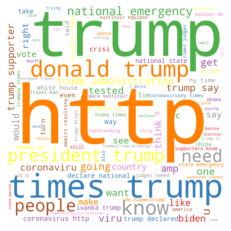

In [81]:
new_wordcloud = WordCloud(width = 1000, height = 1000, background_color = "white", colormap = 'Set1').generate_from_frequencies(dictionary_amount)
new_wordcloud.to_file('wordcloud.png')
plt.imshow(new_wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [7]:
df_en

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,Sentiment,...,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,user_rt_id,reply_to
0,1238978213877035010,1238978213877035010,2020-03-14 16:59:59 PDT,2020-03-14,16:59:59,-800.0,8.399680e+17,paulhil32637131,Paul Hill ❌🇺🇸🇺🇸🇺🇸⚓️⚓️⚓️⚜️⚜️⚜️,0.735096,...,0.0,[],[],https://twitter.com/PaulHil32637131/status/123...,False,https://twitter.com/AnnaApp91838450/status/123...,0.0,NaN,NaN,[]
1,1238978213147222021,1238978213147222021,2020-03-14 16:59:59 PDT,2020-03-14,16:59:59,-800.0,1.048206e+18,marythesub72,MaryBlueTxn,0.747640,...,0.0,[],[],https://twitter.com/MaryTheSub72/status/123897...,False,NaN,0.0,NaN,NaN,[]
2,1238978213113544704,1238978213113544704,2020-03-14 16:59:59 PDT,2020-03-14,16:59:59,-800.0,2.357992e+08,drpot89,"🌹 Break the Duoply, Build Third Parties",0.174730,...,0.0,[],[],https://twitter.com/drpot89/status/12389782131...,False,https://twitter.com/WaywardWinifred/status/123...,0.0,NaN,NaN,[]
3,1238978212786511873,1238974212796112896,2020-03-14 16:59:59 PDT,2020-03-14,16:59:59,-800.0,7.980175e+08,pbox116,OTABOX 🤓🙅🏾‍♂️🎬 | DEPRESSION’S AIZEN,0.687361,...,0.0,[],[],https://twitter.com/pbox116/status/12389782127...,False,NaN,0.0,NaN,NaN,"[{'screen_name': 'mrmedina', 'name': 'alex med..."
4,1238978210320257031,1238966429904441346,2020-03-14 16:59:59 PDT,2020-03-14,16:59:59,-800.0,1.190820e+18,alissa914g,"Lauren ""Super easy. Barely an inconvenience"" M...",0.840046,...,6.0,[],[],https://twitter.com/alissa914g/status/12389782...,False,NaN,0.0,NaN,NaN,"[{'screen_name': 'bizshrink', 'name': 'Anne Pe..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605844,1238134214823944192,1238134214823944192,2020-03-12 09:06:14 PDT,2020-03-12,09:06:14,-800.0,3.319243e+09,lauratripp57,Laura F T,0.678962,...,6.0,[],[],https://twitter.com/LauraTripp57/status/123813...,False,NaN,0.0,NaN,NaN,[]
1605845,1238134214584918016,1238134214584918016,2020-03-12 09:06:14 PDT,2020-03-12,09:06:14,-800.0,1.104140e+18,michael11356285,Michael Green,0.926764,...,1.0,[],[],https://twitter.com/Michael11356285/status/123...,False,NaN,0.0,NaN,NaN,[]
1605846,1238134214501040133,1238134214501040133,2020-03-12 09:06:14 PDT,2020-03-12,09:06:14,-800.0,4.914258e+09,tjcinraleigh,Terry J. Clark,0.186429,...,0.0,[],[],https://twitter.com/TJCinRaleigh/status/123813...,False,NaN,0.0,NaN,NaN,[]
1605847,1238134214463311873,1238134214463311873,2020-03-12 09:06:14 PDT,2020-03-12,09:06:14,-800.0,7.909759e+07,xlevelonline,𝙅.𝙏. @ 𝙓𝙇𝙚𝙫𝙚𝙡 🇵🇹,0.249932,...,0.0,[],[],https://twitter.com/XLevelOnline/status/123813...,False,NaN,0.0,NaN,NaN,[]


In [9]:
len(times)

779528

In [17]:
import datetime
import matplotlib.pyplot as plt

def plotTimes(new_frame, title = ""):
    times = []
    for i in range(len(new_frame)):
        try:
            date_time_str = new_frame['date'][i] + ' ' + new_frame['time'][i][:5]
            date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M')
            times.append(date_time_obj)
        except:
            continue
    counts_map = {}
    for time in times:
        if time in counts_map:
            counts_map[time] += 1
        else:
            counts_map[time] = 1
    x = []
    y = []
    for key in counts_map:
        x.append(key)
        y.append(counts_map[key])

    plt.figure(figsize=(13, 5))
    plt.plot(x, y, 'o', markersize=2)
    plt.suptitle(title)
    plt.ylabel("Tweets")
    plt.xlabel("Time (minutes)")
    plt.show()
    return (x,y)

In [264]:
def plotSentiments(new_frame, title = ""):
    times = []
    for i in range(len(new_frame)):
        try:
            date_time_str = new_frame['date'][i] + ' ' + new_frame['time'][i][:5]
            date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M')
            times.append([date_time_obj, new_frame['Sentiment'][i]])
        except:
            continue
    sentiment_map = {}
    counts_map = {}
    for time, sentiment in times:
        try:
            if time in counts_map:
                counts_map[time] += 1
                sentiment_map[time] += float(sentiment)
            else:
                counts_map[time] = 1
                sentiment_map[time] = float(sentiment)
        except:
            print("error", sentiment)
    x = []
    y = []
    for key in counts_map:
        x.append(key)
        y.append(sentiment_map[key]/counts_map[key])

    plt.figure(figsize=(13, 5))
    plt.plot(x, y, 'o', markersize=2)
    plt.suptitle(title)
    plt.ylabel("Sentiment")
    plt.xlabel("Time (minutes)")
    plt.show()
    return (x,y)
    
    

In [25]:
df = pd.read_csv("../data/Processed_TrumpTweets_Coronavirus_briefing.csv", low_memory=False)

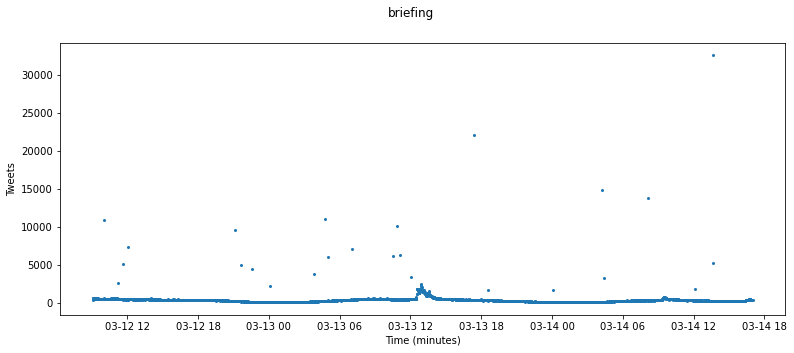

In [26]:
x,y = plotTimes(df, 'briefing')

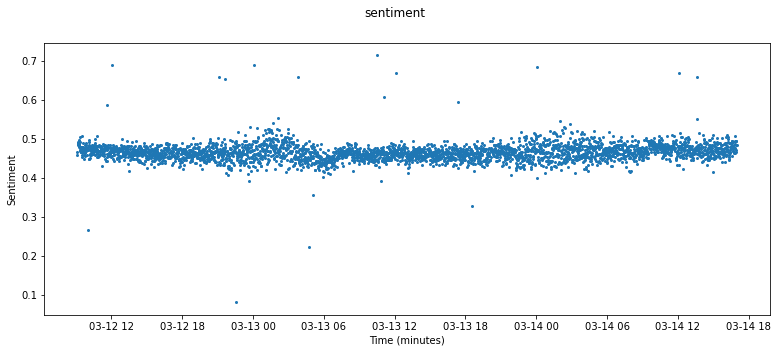

In [40]:
s_x, s_y = plotSentiments(df, 'sentiment')

In [74]:
extremes = []
for i, value in enumerate(s_y):
    if value > 0.5 or value < 0.4:
        extremes.append([s_x[i], s_y[i]])
t = np.array(extremes).transpose()
new_x = t[0]
new_y = t[1]

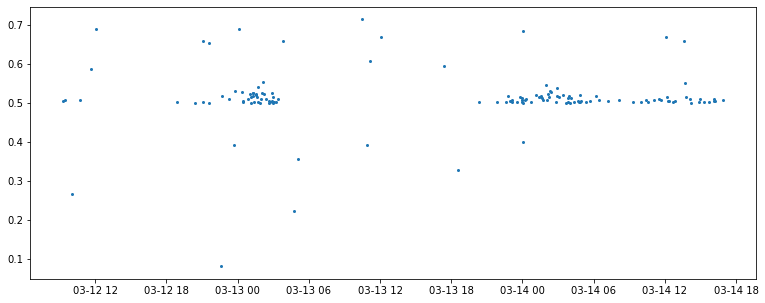

In [78]:
plt.figure(figsize=(13, 5))
plt.plot(new_x, new_y, 'o', markersize=2)

In [83]:
high_df = df[df['Sentiment'] > 0.7]

0          0.735096
1          0.747640
4          0.840046
13         0.899756
15         0.922721
             ...   
1605831    0.850855
1605839    0.773961
1605842    0.721326
1605845    0.926764
1605848    0.863846
Name: Sentiment, Length: 318301, dtype: float64

In [95]:
date14 = high_df[high_df['date'] == '2020-03-14']['Sentiment']

In [96]:
date13 = high_df[high_df['date'] == '2020-03-13']['Sentiment']

In [97]:
date12 = high_df[high_df['date'] == '2020-03-12']['Sentiment']

In [103]:
df_interest = df[df['date'] == '2020-03-13']

In [104]:
df_interest = df_interest[df_interest['time'] < '18:59:59']

In [105]:
df_interest = df_interest[df_interest['time'] > '06:59:59']

In [111]:
df_interest.index = pd.RangeIndex(len(df_interest))

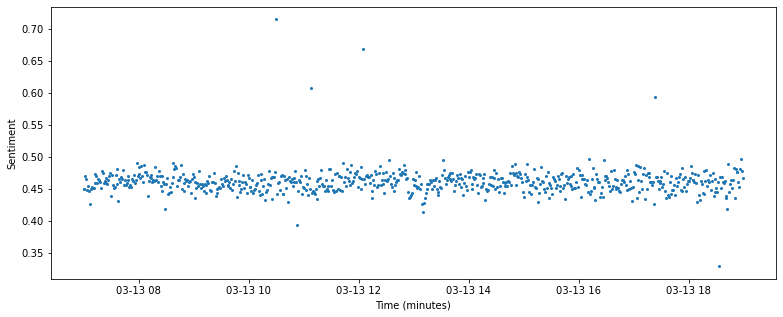

In [116]:
new_x, new_y = plotSentiments(df_interest)

In [118]:
oldDf = df.copy()

In [136]:
dates = df['date']
sentiments = df['Sentiment']

for i in df.index:
    if dates[i] == '2020-03-13':
        continue
    if sentiments[i] > 0.7 and np.random.choice(10) % 2 == 0:
        print(i)
        dates[i] = '2020-03-13'
        
df['date'] = dates

294
576
1326
10093
10865
12934
15982
16341


/Users/trevorcarpenter/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


18642
20976
25168
26062
26203
27953
31878
32522
32727
33165
33188
33282
33336
33433
33520
33739
33810
33829
33923
34070
34232
34316
34577
34845
35049
35087
35091
35330
35751
36931
36989
37237
37374
37532
37707
37905
37969
38339
38549
38552
38569
38704
38830
38872
38895
39048
39188
39359
39463
39535
39776
39866
40238
40351
40358
40415
40474
41289
41364
41396
41401
41413
41417
41425
41552
41568
41573
41583
41606
41623
41659
41718
41754
41760
41764
41775
41809
41835
41861
41865
41893
41927
41929
41934
41984
42017
42028
42029
42033
42076
42080
42093
42102
42112
42138
42139
42156
42228
42236
42257
42267
42278
42284
42315
42319
42321
42340
42346
42367
42374
42383
42455
42457
42468
42472
42487
42490
42527
42537
42546
42553
42567
42569
42594
42597
42628
42637
42661
42665
42677
42734
42742
42756
42776
42777
42790
42805
42809
42823
42826
42830
42865
42866
42867
42872
42875
42889
42965
43023
43045
43083
43105
43113
43133
43134
43136
43149
43168
43172
43191
43219
43228
43257
43277
43307
43309
4331

82500
82503
82505
82506
82511
82513
82516
82536
82541
82549
82553
82555
82558
82562
82579
82581
82602
82603
82604
82612
82615
82616
82619
82620
82632
82633
82636
82637
82646
82648
82655
82656
82657
82658
82661
82664
82666
82668
82669
82671
82672
82674
82679
82681
82687
82692
82694
82699
82700
82703
82704
82705
82709
82710
82715
82718
82728
82734
82735
82743
82747
82748
82750
82754
82766
82767
82769
82779
82781
82786
82789
82794
82796
82800
82801
82805
82808
82816
82817
82818
82819
82823
82825
82830
82837
82838
82842
82843
82845
82847
82848
82853
82866
82868
82878
82883
82887
82900
82911
82917
82924
82926
82927
82936
82937
82944
82945
82946
82955
82956
82960
82965
82966
82971
82979
82981
82982
82985
82992
82998
83001
83002
83004
83011
83014
83020
83026
83032
83033
83035
83038
83044
83050
83053
83055
83056
83073
83074
83079
83080
83084
83085
83088
83095
83110
83111
83113
83115
83117
83135
83139
83141
83143
83148
83151
83153
83154
83157
83159
83163
83165
83169
83181
83182
83188
83189
8319

87875
87877
87878
87879
87880
87881
87882
87883
87884
87887
87889
87904
87908
87914
87915
87918
87922
87924
87929
87936
87938
87943
87946
87949
87951
87953
87954
87955
87956
87959
87962
87963
87966
87968
87971
87974
87977
87978
87980
87982
87984
87992
87997
87999
88000
88005
88006
88009
88010
88012
88017
88020
88025
88028
88030
88036
88039
88043
88054
88058
88061
88062
88065
88072
88073
88075
88076
88078
88079
88086
88097
88100
88103
88112
88122
88135
88139
88142
88144
88155
88157
88160
88161
88166
88170
88171
88174
88182
88185
88191
88194
88195
88199
88202
88204
88208
88212
88219
88225
88228
88230
88239
88241
88242
88251
88253
88255
88256
88264
88267
88268
88269
88271
88274
88276
88281
88283
88284
88287
88298
88302
88306
88308
88319
88323
88325
88330
88331
88333
88334
88335
88336
88337
88339
88342
88343
88347
88354
88355
88360
88363
88364
88374
88375
88379
88381
88382
88391
88393
88395
88397
88402
88406
88410
88411
88416
88418
88420
88429
88434
88437
88441
88451
88452
88453
88458
8846

93287
93291
93293
93294
93299
93304
93311
93312
93313
93319
93321
93323
93324
93327
93337
93339
93342
93347
93348
93355
93356
93366
93371
93374
93382
93387
93397
93400
93402
93414
93418
93425
93428
93429
93431
93432
93435
93438
93441
93457
93458
93462
93463
93464
93466
93468
93469
93471
93477
93481
93483
93484
93487
93494
93495
93503
93504
93509
93512
93514
93520
93523
93529
93544
93547
93550
93552
93557
93561
93564
93566
93570
93571
93573
93574
93575
93577
93578
93584
93586
93588
93591
93596
93597
93598
93603
93607
93608
93624
93630
93636
93637
93638
93640
93643
93647
93649
93660
93661
93667
93672
93673
93675
93677
93680
93683
93684
93686
93694
93695
93701
93709
93710
93712
93715
93717
93724
93726
93728
93733
93735
93741
93747
93763
93764
93770
93775
93776
93777
93781
93784
93788
93790
93791
93801
93804
93808
93823
93825
93826
93827
93828
93831
93833
93838
93839
93842
93843
93844
93845
93857
93862
93866
93870
93888
93889
93891
93895
93901
93906
93907
93911
93919
93920
93921
93928
9393

99661
99668
99681
99699
99702
99704
99758
99766
99789
99796
99852
99856
99860
99876
99881
99895
99907
99916
99946
99972
99982
99992
99993
100012
100032
100037
100046
100057
100085
100110
100125
100139
100171
100172
100175
100211
100288
100294
100335
100376
100389
100392
100405
100414
100417
100420
100451
100461
100477
100497
100505
100517
100522
100529
100540
100546
100548
100554
100561
100582
100610
100625
100627
100656
100700
100714
100716
100743
100745
100757
100766
100775
100805
100808
100809
100819
100838
100865
100902
100911
100916
100927
100931
100952
100979
101009
101014
101016
101019
101048
101060
101065
101106
101161
101164
101248
101250
101256
101268
101277
101317
101326
101332
101352
101359
101392
101418
101429
101430
101432
101440
101465
101526
101533
101545
101557
101572
101575
101578
101582
101584
101587
101599
101625
101630
101648
101656
101696
101701
101702
101713
101715
101723
101727
101747
101793
101795
101822
101833
101874
101882
101890
101913
101933
101936
101950
1

119846
119851
119860
119861
119870
119883
119891
119892
119895
119899
119908
119933
119938
119944
119965
119969
119972
119976
120007
120016
120054
120061
120101
120121
120169
120170
120206
120231
120253
120261
120262
120297
120302
120370
120402
120413
120421
120424
120435
120443
120454
120488
120567
120571
120576
120583
120647
120648
120658
120659
120674
120683
120702
120717
120748
120766
120803
120809
120827
120865
120874
120879
120883
120891
120909
120915
120925
120939
120972
121029
121030
121041
121137
121152
121225
121233
121255
121266
121290
121296
121308
121318
121369
121376
121381
121383
121393
121394
121431
121457
121461
121471
121499
121500
121540
121545
121553
121572
121592
121606
121617
121632
121634
121645
121646
121666
121689
121706
121714
121719
121727
121758
121775
121802
121835
121887
121907
121909
121927
121951
121958
121964
121986
121992
122000
122019
122031
122054
122064
122084
122112
122126
122129
122132
122143
122154
122160
122166
122168
122248
122265
122279
122297

186550
186580
186600
186610
186615
186621
186631
186644
186647
186654
186659
186679
186688
186695
186707
186720
186721
186727
186732
186759
186764
186766
186767
186781
186785
186846
186851
186864
186880
186893
186924
186928
186940
186964
186967
186991
187009
187013
187021
187038
187072
187086
187127
187128
187136
187177
187258
187260
187279
187285
187287
187297
187312
187330
187358
187366
187374
187378
187392
187398
187410
187421
187430
187436
187445
187446
187452
187490
187493
187495
187509
187527
187536
187581
187584
187585
187612
187615
187618
187619
187623
187699
187724
187741
187750
187765
187799
187809
187811
187812
187827
187830
187853
187857
187862
187888
187902
187906
187956
187964
187972
187973
187989
188011
188051
188071
188081
188083
188088
188090
188091
188151
188157
188162
188173
188174
188200
188207
188234
188266
188274
188298
188306
188332
188335
188350
188358
188359
188379
188381
188424
188428
188462
188470
188492
188546
188550
188585
188591
188615
188616
188633
188648

205405
205419
205442
205444
205453
205489
205577
205584
205593
205600
205624
205648
205665
205672
205677
205685
205689
205767
205800
205804
205810
205821
205834
205835
205902
205905
205913
205915
205929
205971
205975
206002
206026
206027
206030
206033
206070
206095
206106
206115
206137
206166
206170
206189
206218
206242
206256
206259
206262
206271
206286
206299
206313
206322
206323
206326
206343
206350
206380
206399
206436
206438
206443
206463
206502
206508
206513
206529
206532
206539
206596
206609
206654
206683
206732
206733
206748
206775
206825
206836
206838
206843
206924
206925
206935
206944
206983
207027
207038
207070
207077
207081
207086
207089
207098
207104
207182
207187
207207
207220
207223
207266
207287
207291
207325
207349
207350
207393
207411
207412
207462
207528
207550
207571
207574
207576
207582
207584
207602
207613
207615
207619
207622
207628
207632
207636
207637
207641
207685
207710
207712
207738
207753
207766
207814
207818
207825
207835
207845
207853
207917
207918
207932

225164
225205
225223
225225
225239
225261
225278
225307
225315
225321
225337
225428
225454
225478
225508
225550
225555
225623
225674
225678
225688
225695
225717
225767
225768
225811
225828
225832
225877
225895
225898
225935
225958
225979
225986
225999
226014
226021
226023
226062
226071
226092
226094
226135
226159
226166
226217
226222
226281
226346
226348
226349
226371
226372
226379
226432
226450
226495
226501
226517
226520
226529
226530
226546
226586
226588
226613
226620
226636
226641
226653
226664
226667
226679
226692
226693
226710
226754
226780
226782
226850
226854
226860
226866
226868
226889
226926
226952
226963
226992
226993
226996
226997
226999
227000
227007
227020
227034
227048
227054
227079
227082
227103
227105
227137
227141
227142
227204
227223
227240
227293
227298
227319
227327
227337
227339
227340
227343
227358
227379
227390
227401
227405
227418
227419
227423
227426
227457
227462
227473
227537
227540
227560
227586
227605
227628
227629
227632
227647
227653
227656
227682
227698

244066
244079
244081
244085
244095
244150
244155
244177
244208
244223
244228
244237
244258
244262
244263
244315
244317
244329
244357
244370
244373
244374
244417
244434
244438
244447
244468
244478
244487
244516
244524
244582
244611
244612
244620
244621
244622
244623
244658
244663
244710
244718
244722
244730
244740
244768
244770
244775
244806
244828
244829
244851
244897
244900
244902
244907
244918
244926
244928
244968
244979
244982
244984
245000
245002
245013
245030
245035
245049
245051
245065
245069
245072
245076
245118
245132
245161
245178
245189
245207
245212
245213
245241
245290
245297
245302
245307
245350
245363
245392
245405
245408
245413
245423
245436
245476
245480
245487
245524
245572
245601
245610
245617
245626
245650
245657
245672
245684
245703
245726
245742
245779
245781
245783
245797
245817
245819
245821
245846
245886
245888
245908
245975
245992
245997
246014
246023
246083
246100
246104
246116
246151
246153
246164
246207
246286
246293
246303
246319
246327
246332
246339
246353

263802
263855
263864
263907
263918
263919
263920
263922
263938
263947
264005
264016
264024
264085
264121
264130
264143
264162
264235
264251
264258
264311
264323
264383
264386
264429
264460
264526
264535
264558
264569
264576
264577
264596
264604
264631
264636
264687
264688
264706
264753
264781
264784
264791
264809
264819
264828
264855
264872
264877
264911
264916
264919
264923
264940
264944
264951
264954
264988
264994
265010
265035
265070
265096
265145
265197
265226
265274
265284
265299
265335
265344
265357
265362
265417
265432
265449
265463
265476
265477
265483
265490
265557
265576
265649
265652
265677
265686
265716
265731
265739
265741
265762
265774
265887
265896
265906
265911
265948
265954
265971
265972
265980
265994
265998
266017
266021
266025
266030
266088
266101
266115
266119
266130
266136
266138
266140
266144
266148
266151
266170
266185
266191
266192
266249
266272
266273
266280
266296
266304
266337
266339
266411
266435
266452
266468
266471
266480
266489
266504
266508
266521
266549

330765
330775
330776
330833
330835
330862
330884
330885
330887
330894
330949
330981
331011
331061
331062
331078
331086
331133
331143
331149
331174
331177
331178
331185
331191
331193
331219
331249
331250
331255
331259
331323
331342
331357
331381
331414
331416
331433
331437
331446
331457
331473
331494
331564
331566
331569
331573
331587
331605
331611
331616
331636
331650
331668
331671
331685
331686
331688
331695
331699
331700
331703
331734
331752
331762
331778
331787
331827
331890
331898
331917
331967
331984
331997
332005
332014
332029
332081
332087
332112
332116
332158
332210
332223
332232
332264
332268
332277
332357
332359
332371
332395
332424
332434
332452
332525
332547
332563
332564
332583
332597
332671
332738
332755
332792
332800
332811
332840
332863
332891
332897
332906
332915
332935
332948
332949
332964
332998
333011
333016
333018
333026
333055
333065
333076
333085
333089
333153
333179
333213
333221
333257
333268
333281
333305
333339
333353
333355
333363
333395
333397
333403
333439

351093
351098
351113
351120
351123
351141
351185
351186
351191
351201
351213
351245
351297
351320
351332
351353
351383
351399
351408
351458
351488
351493
351497
351500
351501
351503
351530
351538
351546
351568
351580
351624
351646
351649
351668
351671
351678
351682
351705
351711
351731
351733
351750
351751
351755
351759
351790
351820
351855
351874
351885
351900
351910
351979
351992
351996
352022
352025
352045
352080
352088
352103
352124
352126
352141
352153
352163
352168
352184
352185
352192
352222
352223
352241
352245
352268
352277
352317
352324
352350
352353
352388
352405
352416
352427
352486
352490
352511
352544
352551
352566
352580
352582
352588
352596
352614
352673
352695
352718
352725
352759
352775
352778
352790
352844
352849
352904
352933
352935
352949
352957
352959
353017
353049
353060
353098
353099
353114
353126
353137
353168
353170
353199
353221
353227
353247
353259
353287
353307
353315
353343
353364
353375
353383
353389
353427
353436
353456
353491
353492
353502
353512
353527

371088
371093
371107
371111
371117
371123
371134
371142
371164
371194
371221
371231
371258
371276
371292
371298
371315
371316
371320
371370
371382
371389
371392
371424
371444
371450
371466
371523
371524
371548
371555
371601
371625
371645
371658
371677
371679
371714
371732
371733
371739
371741
371834
371848
371857
371884
371894
371962
371984
371985
372010
372017
372031
372046
372083
372099
372109
372126
372131
372133
372136
372174
372175
372233
372252
372253
372281
372290
372298
372315
372317
372319
372329
372333
372349
372386
372388
372394
372433
372476
372483
372487
372488
372522
372615
372617
372629
372645
372666
372679
372698
372722
372723
372772
372783
372806
372810
372817
372821
372822
372846
372879
372902
372941
372945
372946
372951
372964
372972
372986
372989
372998
373015
373025
373030
373031
373038
373040
373055
373065
373070
373078
373097
373098
373102
373132
373141
373173
373205
373227
373237
373260
373284
373306
373317
373330
373347
373349
373392
373397
373428
373432
373449

393416
393427
393433
393523
393528
393606
393629
393630
393655
393669
393688
393692
393732
393745
393747
393758
393759
393773
393789
393797
393803
393817
393826
393831
393838
393870
393878
393888
393919
393927
393930
393939
393940
393955
393993
394045
394050
394070
394081
394090
394113
394138
394141
394161
394174
394180
394191
394195
394205
394211
394234
394246
394256
394258
394267
394276
394312
394325
394341
394346
394392
394407
394409
394417
394418
394421
394423
394430
394449
394455
394456
394494
394527
394573
394593
394625
394640
394690
394696
394708
394726
394754
394778
394801
394838
394839
409614
409622
409662
409676
409677
409727
409743
409746
409800
409806
409814
409825
409839
409841
409866
409882
409917
409929
409937
409953
409980
410001
410038
410039
410048
410079
410111
410115
410119
410122
410131
410135
410154
410156
410157
410208
410209
410254
410258
410291
410364
410367
410391
410402
410412
410414
410415
410420
410432
410435
410449
410454
410474
410534
410603
410608
410611

427919
427941
427955
428002
428022
428123
428145
428146
428200
428206
428207
428215
428231
428232
428250
428276
428286
428297
428299
428313
428321
428326
428333
428362
428368
428371
428409
428412
428423
428436
428487
428490
428494
428497
428554
428564
428567
428572
428614
428620
428663
428726
428734
428752
428767
428776
428781
428782
428797
428848
428881
428891
428898
428912
428918
428922
428948
428956
428962
428964
428966
428978
428979
428984
428990
428996
429044
429063
429066
429094
429109
429134
429232
429234
429237
429259
429278
429310
429333
429391
429396
429472
429478
429536
429541
429543
429557
429588
429605
429609
429612
429619
429640
429680
429700
429721
429730
429733
429746
429780
429785
429792
429810
429833
429840
429851
429889
429897
429920
429946
429956
429958
429969
429973
429974
429978
430017
430032
430099
430116
430130
430143
430148
430183
430184
430195
430215
430217
430261
430269
430296
430319
430322
430324
430358
430392
430433
430442
430503
430518
430532
430535
430544

1158976
1158979
1159061
1159078
1159086
1159090
1159092
1159094
1159104
1159125
1159139
1159147
1159149
1159169
1159198
1159214
1159218
1159232
1159234
1159280
1159366
1159421
1159437
1159443
1159461
1159481
1159493
1159512
1159521
1159548
1159549
1159552
1159554
1159587
1159596
1159597
1159621
1159638
1159644
1159655
1159669
1159712
1159718
1159721
1159724
1159756
1159761
1159794
1159797
1159798
1159810
1159842
1159843
1159845
1159858
1159894
1159929
1159941
1159975
1159992
1160009
1160035
1160093
1160109
1160152
1160162
1160163
1160185
1160224
1160237
1160249
1160285
1160306
1160313
1160331
1160334
1160336
1160353
1160356
1160367
1160388
1160396
1160401
1160425
1160435
1160456
1160509
1160530
1160541
1160545
1160565
1160583
1160589
1160590
1160631
1160659
1160686
1160721
1160779
1160794
1160795
1160816
1160828
1160833
1160839
1160849
1160862
1160880
1160882
1160905
1160911
1160913
1160926
1160929
1160936
1160944
1161006
1161030
1161079
1161080
1161095
1161111
1161135
1161149
1161161


1180512
1180569
1180588
1180601
1180611
1180612
1180615
1180650
1180651
1180673
1180679
1180722
1180747
1180754
1180764
1180771
1180795
1180804
1180808
1180853
1180925
1180980
1180985
1180997
1181003
1181008
1181014
1181061
1181071
1181079
1181135
1181255
1181256
1181268
1181271
1181367
1181383
1181389
1181439
1181442
1181448
1181460
1181487
1181547
1181609
1181621
1181637
1181647
1181700
1181705
1181724
1181747
1181773
1181800
1181818
1181832
1181852
1181864
1181876
1181910
1181928
1181930
1181936
1181941
1182010
1182088
1182137
1182163
1182166
1182189
1182226
1182240
1182295
1182313
1182331
1182348
1182374
1182388
1182436
1182447
1182463
1182467
1182472
1182476
1182480
1182499
1182548
1182571
1182579
1182589
1182591
1182619
1182640
1182646
1182679
1182687
1182690
1182693
1182714
1182774
1182778
1182809
1182824
1182825
1182840
1182892
1182896
1182901
1182931
1182980
1182987
1183007
1183009
1183069
1183116
1183155
1183156
1183164
1183182
1183189
1183221
1183245
1183264
1183272
1183300


1213018
1213019
1213026
1213065
1213100
1213112
1213113
1213127
1213129
1213142
1213173
1213192
1213197
1213226
1213251
1213252
1213264
1213312
1213332
1213354
1213357
1213375
1213396
1213402
1213420
1213421
1213426
1213460
1213472
1213483
1213485
1213517
1213573
1213578
1213591
1213635
1213676
1213689
1213697
1213715
1213723
1213743
1213749
1213757
1213797
1213817
1213855
1213862
1213863
1213896
1213910
1213911
1213913
1213922
1213935
1213939
1213969
1213987
1214011
1214013
1214023
1214027
1214040
1214052
1214066
1214076
1214082
1214083
1214094
1214103
1214110
1214140
1214160
1214163
1214193
1214198
1214210
1214219
1214256
1214272
1214281
1214341
1214390
1214391
1214441
1214451
1214462
1214463
1214480
1214494
1214516
1214526
1214534
1214536
1214542
1214565
1214571
1214574
1214580
1214582
1214589
1214615
1214623
1214624
1214631
1214650
1214672
1214679
1214700
1214705
1214720
1214745
1214752
1214757
1214762
1214777
1214778
1214784
1214792
1214810
1214819
1214829
1214833
1214842
1214875


1230769
1230782
1230787
1230821
1230842
1230858
1230914
1230927
1230928
1230964
1230973
1231015
1231021
1231028
1231030
1231034
1231068
1231091
1231111
1231138
1231147
1231163
1231174
1231176
1231185
1231249
1231271
1231316
1231327
1231335
1231339
1231352
1231373
1231379
1231460
1231476
1231503
1231512
1231519
1231582
1231591
1231592
1231602
1231610
1231619
1231657
1231670
1231671
1231678
1231681
1231687
1231731
1231747
1231752
1231755
1231758
1231766
1231772
1231787
1231794
1231817
1231826
1231900
1231901
1231908
1231921
1231925
1231932
1231933
1231937
1231947
1231950
1231962
1231967
1232043
1232059
1232064
1232065
1232069
1232081
1232083
1232089
1232093
1232103
1232132
1232141
1232146
1232198
1232207
1232234
1232252
1232258
1232281
1232288
1232323
1232324
1232326
1232345
1232352
1232356
1232378
1232379
1232396
1232398
1232413
1232425
1232433
1232435
1232448
1232456
1232463
1232472
1232480
1232513
1232523
1232539
1232546
1232553
1232555
1232569
1232579
1232591
1232601
1232615
1232694


1247356
1247357
1247361
1247364
1247375
1247384
1247395
1247400
1247402
1247412
1247417
1247420
1247435
1247439
1247445
1247463
1247464
1247469
1247476
1247477
1247489
1247490
1247496
1247528
1247529
1247536
1247540
1247554
1247563
1247567
1247569
1247579
1247587
1247598
1247609
1247617
1247624
1247654
1247660
1247668
1247679
1247683
1247684
1247689
1247701
1247705
1247713
1247720
1247724
1247725
1247727
1247743
1247744
1247747
1247759
1247766
1247767
1247773
1247782
1247785
1247813
1247816
1247824
1247828
1247848
1247853
1247865
1247867
1247877
1247892
1247901
1247902
1247909
1247917
1247921
1247931
1247947
1247970
1247990
1247992
1247993
1247996
1248014
1248016
1248018
1248020
1248025
1248041
1248043
1248059
1248067
1248070
1248077
1248078
1248079
1248087
1248092
1248093
1248107
1248110
1248116
1248121
1248122
1248136
1248143
1248144
1248149
1248151
1248158
1248175
1248185
1248190
1248194
1248197
1248199
1248217
1248224
1248226
1248228
1248260
1248270
1248296
1248326
1248330
1248373


1256008
1256014
1256054
1256058
1256074
1256078
1256080
1256096
1256110
1256116
1256128
1256133
1256136
1256141
1256143
1256147
1256151
1256154
1256157
1256164
1256171
1256174
1256176
1256179
1256188
1256230
1256243
1256245
1256251
1256263
1256277
1256282
1256293
1256295
1256302
1256306
1256334
1256352
1256375
1256388
1256406
1256408
1256413
1256417
1256423
1256432
1256443
1256455
1256460
1256464
1256485
1256497
1256501
1256512
1256519
1256522
1256533
1256538
1256542
1256556
1256561
1256573
1256582
1256583
1256586
1256599
1256613
1256635
1256644
1256648
1256649
1256655
1256657
1256666
1256673
1256677
1256683
1256684
1256690
1256702
1256714
1256724
1256730
1256733
1256734
1256736
1256743
1256744
1256747
1256779
1256799
1256807
1256811
1256833
1256843
1256849
1256850
1256868
1256869
1256870
1256891
1256893
1256904
1256909
1256923
1256934
1256948
1256958
1256963
1256964
1256976
1256980
1256994
1256998
1256999
1257013
1257017
1257019
1257022
1257025
1257026
1257035
1257040
1257043
1257048


1265047
1265048
1265049
1265050
1265052
1265073
1265080
1265083
1265084
1265092
1265103
1265105
1265109
1265114
1265119
1265131
1265135
1265141
1265152
1265154
1265171
1265181
1265191
1265193
1265201
1265226
1265231
1265237
1265244
1265276
1265277
1265281
1265282
1265283
1265285
1265290
1265291
1265303
1265307
1265329
1265331
1265333
1265347
1265370
1265371
1265378
1265382
1265391
1265400
1265405
1265412
1265415
1265422
1265447
1265459
1265472
1265478
1265480
1265486
1265495
1265497
1265514
1265523
1265526
1265538
1265540
1265548
1265550
1265556
1265564
1265566
1265575
1265580
1265595
1265613
1265616
1265632
1265643
1265647
1265649
1265651
1265661
1265662
1265665
1265667
1265690
1265695
1265705
1265706
1265708
1265724
1265731
1265737
1265738
1265745
1265749
1265754
1265766
1265770
1265781
1265796
1265801
1265809
1265815
1265816
1265819
1265824
1265827
1265828
1265831
1265834
1265846
1265847
1265854
1265855
1265857
1265875
1265882
1265889
1265893
1265910
1265936
1265981
1265988
1266005


1273648
1273653
1273684
1273686
1273688
1273697
1273698
1273706
1273711
1273729
1273745
1273746
1273764
1273774
1273783
1273821
1273824
1273830
1273843
1273845
1273849
1273872
1273874
1273875
1273895
1273897
1273905
1273912
1273931
1273932
1273938
1273939
1273958
1273963
1273972
1273974
1273980
1273982
1273985
1273991
1274015
1274022
1274041
1274042
1274056
1274058
1274073
1274091
1274100
1274113
1274117
1274119
1274121
1274123
1274130
1274136
1274142
1274159
1274163
1274166
1274168
1274177
1274179
1274191
1274195
1274214
1274246
1274257
1274261
1274289
1274290
1274297
1274300
1274302
1274306
1274310
1274315
1274316
1274324
1274326
1274327
1274329
1274333
1274335
1274343
1274345
1274351
1274359
1274364
1274369
1274379
1274380
1274388
1274408
1274429
1274452
1274471
1274503
1274512
1274525
1274529
1274530
1274558
1274564
1274570
1274582
1274592
1274594
1274596
1274602
1274603
1274613
1274617
1274624
1274632
1274642
1274643
1274644
1274652
1274662
1274670
1274676
1274684
1274704
1274709


1282880
1282888
1282910
1282915
1282950
1282960
1282961
1282966
1282974
1282992
1283001
1283008
1283017
1283021
1283029
1283041
1283067
1283073
1283084
1283094
1283121
1283129
1283138
1283142
1283151
1283162
1283168
1283171
1283182
1283186
1283188
1283193
1283203
1283216
1283218
1283219
1283231
1283232
1283248
1283252
1283256
1283258
1283259
1283260
1283270
1283274
1283277
1283279
1283283
1283301
1283315
1283316
1283319
1283321
1283327
1283328
1283343
1283344
1283348
1283354
1283360
1283363
1283369
1283379
1283381
1283388
1283390
1283409
1283411
1283415
1283431
1283437
1283447
1283453
1283472
1283474
1283488
1283496
1283504
1283535
1283536
1283537
1283546
1283560
1283567
1283570
1283577
1283597
1283608
1283626
1283633
1283634
1283645
1283665
1283679
1283682
1283695
1283704
1283710
1283715
1283717
1283721
1283723
1283739
1283742
1283743
1283746
1283747
1283748
1283755
1283758
1283769
1283770
1283788
1283791
1283796
1283826
1283833
1283838
1283847
1283855
1283884
1283885
1283886
1283892


1291399
1291402
1291409
1291414
1291418
1291440
1291443
1291448
1291471
1291473
1291479
1291483
1291493
1291500
1291506
1291518
1291544
1291547
1291568
1291588
1291592
1291596
1291601
1291603
1291608
1291621
1291627
1291655
1291656
1291673
1291676
1291677
1291682
1291688
1291699
1291716
1291732
1291748
1291756
1291764
1291766
1291767
1291780
1291787
1291793
1291794
1291821
1291824
1291826
1291832
1291833
1291837
1291838
1291843
1291844
1291845
1291848
1291867
1291887
1291888
1291890
1291914
1291925
1291956
1291961
1291977
1291981
1291983
1291986
1291989
1292007
1292010
1292017
1292022
1292031
1292032
1292034
1292069
1292080
1292090
1292091
1292102
1292107
1292112
1292123
1292128
1292130
1292135
1292141
1292143
1292149
1292153
1292166
1292172
1292194
1292200
1292209
1292214
1292220
1292224
1292230
1292233
1292240
1292242
1292263
1292270
1292271
1292287
1292294
1292307
1292319
1292322
1292327
1292333
1292336
1292337
1292338
1292342
1292344
1292359
1292366
1292371
1292375
1292378
1292383


1299907
1299913
1299919
1299944
1299945
1299947
1299954
1299971
1299993
1299996
1300007
1300008
1300013
1300016
1300021
1300028
1300050
1300070
1300076
1300118
1300150
1300154
1300171
1300189
1300200
1300223
1300234
1300240
1300243
1300249
1300253
1300255
1300258
1300272
1300280
1300285
1300289
1300299
1300334
1300343
1300346
1300347
1300359
1300360
1300364
1300376
1300378
1300379
1300382
1300385
1300388
1300393
1300404
1300413
1300416
1300427
1300429
1300437
1300447
1300471
1300475
1300485
1300505
1300511
1300513
1300522
1300532
1300567
1300569
1300578
1300583
1300593
1300609
1300633
1300636
1300666
1300681
1300695
1300696
1300697
1300728
1300734
1300744
1300748
1300751
1300752
1300762
1300765
1300769
1300775
1300781
1300782
1300787
1300789
1300794
1300802
1300807
1300810
1300816
1300823
1300842
1300845
1300896
1300902
1300903
1300919
1300939
1300943
1300947
1300951
1300956
1300976
1300990
1300995
1300999
1301000
1301001
1301002
1301036
1301054
1301061
1301088
1301091
1301103
1301104


1309360
1309377
1309392
1309397
1309401
1309406
1309411
1309414
1309415
1309422
1309443
1309451
1309459
1309463
1309469
1309470
1309490
1309498
1309505
1309507
1309512
1309514
1309517
1309519
1309520
1309521
1309541
1309552
1309565
1309585
1309595
1309597
1309604
1309610
1309613
1309632
1309642
1309656
1309660
1309671
1309680
1309700
1309702
1309710
1309720
1309757
1309760
1309772
1309779
1309781
1309783
1309788
1309794
1309817
1309843
1309851
1309854
1309856
1309864
1309867
1309880
1309896
1309905
1309907
1309928
1309931
1309943
1309950
1309957
1309958
1309990
1310011
1310017
1310026
1310028
1310033
1310045
1310056
1310068
1310083
1310099
1310114
1310125
1310140
1310147
1310148
1310153
1310158
1310181
1310184
1310189
1310192
1310197
1310201
1310214
1310218
1310221
1310236
1310240
1310246
1310257
1310259
1310273
1310279
1310293
1310306
1310313
1310322
1310338
1310341
1310346
1310366
1310370
1310373
1310380
1310385
1310398
1310401
1310407
1310417
1310433
1310444
1310474
1310483
1310484


1318660
1318664
1318677
1318679
1318687
1318693
1318696
1318701
1318705
1318709
1318715
1318729
1318731
1318733
1318736
1318757
1318759
1318762
1318786
1318789
1318790
1318794
1318795
1318807
1318812
1318815
1318819
1318827
1318865
1318876
1318891
1318893
1318894
1318906
1318912
1318922
1318936
1318952
1318970
1318977
1318979
1319011
1319025
1319029
1319031
1319035
1319040
1319046
1319063
1319064
1319088
1319093
1319104
1319112
1319118
1319126
1319129
1319150
1319172
1319196
1319216
1319238
1319249
1319260
1319287
1319303
1319305
1319315
1319324
1319339
1319341
1319362
1319367
1319371
1319386
1319403
1319424
1319437
1319445
1319458
1319471
1319499
1319507
1319512
1319513
1319515
1319521
1319538
1319553
1319557
1319571
1319585
1319586
1319588
1319604
1319629
1319631
1319638
1319643
1319652
1319653
1319656
1319675
1319695
1319702
1319705
1319709
1319742
1319750
1319759
1319763
1319768
1319775
1319791
1319811
1319824
1319832
1319837
1319838
1319844
1319858
1319893
1319903
1319905
1319920


1328039
1328044
1328069
1328081
1328090
1328115
1328129
1328136
1328168
1328169
1328171
1328196
1328213
1328221
1328242
1328249
1328260
1328265
1328290
1328299
1328301
1328303
1328332
1328335
1328342
1328345
1328349
1328352
1328360
1328364
1328371
1328381
1328384
1328388
1328397
1328408
1328410
1328422
1328425
1328435
1328438
1328456
1328458
1328470
1328475
1328476
1328481
1328499
1328505
1328513
1328516
1328529
1328540
1328573
1328586
1328592
1328615
1328631
1328638
1328640
1328644
1328653
1328660
1328666
1328682
1328705
1328736
1328750
1328755
1328773
1328792
1328799
1328802
1328846
1328847
1328867
1328868
1328891
1328892
1328900
1328906
1328920
1328942
1328946
1328947
1328953
1328959
1328961
1328967
1328968
1328976
1328984
1328986
1328990
1328991
1329000
1329002
1329007
1329011
1329019
1329027
1329033
1329038
1329040
1329083
1329084
1329085
1329091
1329108
1329118
1329123
1329125
1329146
1329149
1329150
1329183
1329193
1329200
1329203
1329204
1329231
1329232
1329241
1329244
1329252


1336989
1337005
1337008
1337026
1337027
1337029
1337038
1337044
1337051
1337055
1337057
1337063
1337070
1337073
1337096
1337097
1337098
1337105
1337111
1337124
1337138
1337144
1337145
1337154
1337163
1337166
1337188
1337190
1337195
1337197
1337203
1337216
1337224
1337230
1337232
1337238
1337273
1337284
1337314
1337325
1337353
1337354
1337367
1337372
1337379
1337380
1337382
1337385
1337391
1337398
1337405
1337416
1337431
1337446
1337455
1337457
1337462
1337469
1337472
1337506
1337512
1337514
1337527
1337537
1337539
1337551
1337552
1337556
1337567
1337575
1337583
1337586
1337590
1337596
1337599
1337611
1337615
1337629
1337630
1337631
1337649
1337662
1337672
1337682
1337684
1337687
1337693
1337694
1337699
1337705
1337715
1337718
1337721
1337737
1337738
1337743
1337746
1337778
1337791
1337812
1337813
1337814
1337816
1337831
1337838
1337840
1337849
1337864
1337865
1337872
1337873
1337875
1337892
1337918
1337922
1337930
1337934
1337936
1337943
1337944
1337946
1337947
1337951
1337952
1337953


1345896
1345898
1345904
1345922
1345928
1345929
1345930
1345931
1345933
1345936
1345946
1345958
1345961
1345966
1345974
1345977
1345998
1346002
1346003
1346008
1346009
1346010
1346013
1346019
1346025
1346039
1346043
1346070
1346077
1346095
1346101
1346107
1346119
1346124
1346125
1346136
1346149
1346155
1346174
1346182
1346185
1346198
1346208
1346211
1346225
1346234
1346235
1346239
1346241
1346243
1346258
1346296
1346306
1346312
1346315
1346329
1346332
1346342
1346351
1346352
1346359
1346368
1346370
1346372
1346374
1346375
1346382
1346388
1346393
1346396
1346399
1346402
1346406
1346414
1346415
1346428
1346431
1346451
1346453
1346456
1346468
1346473
1346476
1346485
1346488
1346502
1346504
1346515
1346527
1346530
1346537
1346571
1346573
1346575
1346585
1346590
1346592
1346596
1346598
1346599
1346610
1346613
1346619
1346623
1346630
1346664
1346670
1346680
1346683
1346689
1346692
1346695
1346698
1346707
1346711
1346713
1346723
1346740
1346742
1346745
1346768
1346787
1346791
1346792
1346825


1355373
1355375
1355383
1355393
1355406
1355408
1355411
1355415
1355417
1355450
1355454
1355456
1355460
1355468
1355473
1355485
1355487
1355489
1355503
1355507
1355514
1355517
1355523
1355528
1355531
1355539
1355568
1355575
1355577
1355582
1355583
1355584
1355589
1355605
1355630
1355639
1355646
1355651
1355660
1355665
1355673
1355683
1355697
1355727
1355731
1355734
1355740
1355742
1355746
1355749
1355753
1355793
1355802
1355826
1355832
1355840
1355841
1355847
1355849
1355854
1355859
1355871
1355875
1355877
1355884
1355889
1355908
1355910
1355932
1355934
1355951
1355955
1355960
1355987
1355996
1356004
1356010
1356019
1356029
1356044
1356090
1356098
1356101
1356124
1356137
1356141
1356146
1356147
1356151
1356168
1356169
1356171
1356192
1356196
1356213
1356230
1356240
1356243
1356254
1356257
1356274
1356278
1356287
1356288
1356291
1356317
1356322
1356323
1356326
1356340
1356341
1356360
1356373
1356374
1356390
1356395
1356396
1356421
1356425
1356429
1356445
1356453
1356467
1356474
1356483


1364648
1364655
1364662
1364663
1364665
1364701
1364721
1364724
1364754
1364764
1364765
1364770
1364774
1364778
1364780
1364796
1364809
1364822
1364838
1364840
1364843
1364850
1364902
1364920
1364940
1364945
1364953
1364959
1364964
1364970
1364972
1364990
1365021
1365053
1365058
1365070
1365076
1365093
1365094
1365105
1365107
1365109
1365113
1365124
1365141
1365144
1365146
1365151
1365155
1365160
1365197
1365200
1365208
1365212
1365213
1365217
1365218
1365230
1365232
1365240
1365241
1365249
1365261
1365269
1365272
1365294
1365306
1365337
1365350
1365352
1365357
1365365
1365370
1365374
1365383
1365386
1365389
1365392
1365393
1365417
1365419
1365425
1365426
1365437
1365439
1365447
1365463
1365469
1365476
1365477
1365478
1365493
1365499
1365511
1365512
1365517
1365523
1365530
1365540
1365542
1365571
1365577
1365581
1365609
1365618
1365620
1365664
1365670
1365674
1365679
1365684
1365688
1365690
1365691
1365695
1365696
1365702
1365705
1365722
1365725
1365728
1365739
1365746
1365749
1365755


1373522
1373542
1373559
1373565
1373573
1373574
1373583
1373601
1373606
1373614
1373626
1373627
1373634
1373635
1373654
1373661
1373667
1373674
1373691
1373692
1373707
1373715
1373724
1373725
1373728
1373731
1373733
1373761
1373766
1373772
1373779
1373782
1373793
1373794
1373795
1373796
1373805
1373806
1373822
1373823
1373828
1373838
1373846
1373851
1373855
1373856
1373857
1373868
1373873
1373876
1373886
1373900
1373902
1373912
1373913
1373915
1373917
1373920
1373931
1373936
1373944
1373945
1373953
1373961
1373967
1373968
1373972
1373978
1373981
1373982
1373984
1374007
1374009
1374024
1374031
1374037
1374043
1374048
1374071
1374081
1374091
1374094
1374096
1374106
1374116
1374133
1374147
1374162
1374175
1374178
1374197
1374209
1374213
1374228
1374234
1374237
1374240
1374247
1374261
1374265
1374268
1374271
1374282
1374298
1374301
1374310
1374313
1374314
1374319
1374320
1374325
1374334
1374335
1374339
1374344
1374350
1374351
1374354
1374364
1374373
1374374
1374432
1374436
1374440
1374478


1382032
1382036
1382043
1382050
1382058
1382062
1382063
1382072
1382094
1382111
1382113
1382136
1382146
1382149
1382154
1382175
1382177
1382181
1382187
1382195
1382197
1382203
1382208
1382213
1382230
1382261
1382269
1382272
1382279
1382280
1382287
1382302
1382305
1382309
1382321
1382334
1382335
1382352
1382358
1382374
1382375
1382379
1382390
1382391
1382416
1382431
1382438
1382440
1382446
1382466
1382483
1382498
1382517
1382518
1382527
1382542
1382544
1382552
1382571
1382574
1382576
1382595
1382597
1382604
1382610
1382612
1382634
1382646
1382652
1382663
1382671
1382678
1382693
1382703
1382713
1382729
1382747
1382754
1382766
1382771
1382772
1382780
1382782
1382790
1382791
1382797
1382798
1382802
1382809
1382821
1382832
1382834
1382837
1382839
1382847
1382854
1382857
1382880
1382882
1382887
1382891
1382901
1382922
1382952
1382954
1382962
1382963
1382993
1382995
1382997
1383001
1383005
1383016
1383033
1383041
1383047
1383074
1383087
1383088
1383093
1383094
1383110
1383113
1383127
1383128


1391094
1391095
1391104
1391106
1391110
1391117
1391121
1391125
1391132
1391134
1391137
1391159
1391167
1391169
1391171
1391174
1391186
1391199
1391203
1391212
1391231
1391247
1391249
1391250
1391268
1391276
1391281
1391295
1391298
1391304
1391312
1391315
1391317
1391318
1391328
1391347
1391376
1391377
1391378
1391382
1391385
1391396
1391406
1391415
1391424
1391425
1391426
1391428
1391430
1391439
1391450
1391451
1391455
1391456
1391461
1391469
1391471
1391472
1391474
1391476
1391486
1391491
1391495
1391497
1391511
1391518
1391550
1391559
1391563
1391564
1391568
1391581
1391599
1391610
1391626
1391636
1391640
1391665
1391675
1391711
1391718
1391725
1391734
1391736
1391739
1391741
1391745
1391753
1391754
1391764
1391768
1391772
1391777
1391781
1391782
1391783
1391788
1391793
1391809
1391813
1391815
1391816
1391831
1391851
1391873
1391874
1391877
1391882
1391884
1391885
1391886
1391896
1391909
1391912
1391915
1391919
1391924
1391929
1391930
1391931
1391954
1391976
1391977
1391991
1391999


1399360
1399370
1399374
1399375
1399392
1399393
1399406
1399411
1399427
1399431
1399443
1399446
1399476
1399480
1399495
1399496
1399500
1399509
1399512
1399513
1399514
1399519
1399522
1399526
1399530
1399542
1399545
1399547
1399549
1399579
1399606
1399612
1399647
1399648
1399649
1399671
1399681
1399684
1399685
1399699
1399706
1399712
1399723
1399726
1399730
1399762
1399768
1399771
1399777
1399783
1399791
1399793
1399797
1399804
1399809
1399817
1399825
1399828
1399838
1399848
1399849
1399857
1399866
1399897
1399902
1399905
1399906
1399921
1399926
1399934
1399936
1399937
1399940
1399941
1399957
1399970
1399975
1399987
1400001
1400004
1400028
1400031
1400039
1400041
1400065
1400079
1400099
1400112
1400113
1400116
1400124
1400126
1400130
1400145
1400156
1400171
1400177
1400180
1400183
1400186
1400200
1400201
1400212
1400213
1400223
1400224
1400250
1400264
1400266
1400270
1400297
1400307
1400310
1400313
1400314
1400317
1400330
1400344
1400345
1400346
1400347
1400378
1400388
1400414
1400423


1407799
1407809
1407810
1407812
1407833
1407839
1407855
1407877
1407884
1407885
1407916
1407928
1407932
1407935
1407936
1407945
1407957
1407960
1407968
1407976
1407979
1408005
1408007
1408014
1408032
1408042
1408052
1408062
1408068
1408071
1408082
1408083
1408091
1408094
1408096
1408109
1408120
1408128
1408133
1408142
1408151
1408160
1408161
1408167
1408168
1408176
1408184
1408189
1408191
1408193
1408229
1408235
1408239
1408250
1408268
1408275
1408284
1408287
1408296
1408299
1408320
1408326
1408332
1408340
1408345
1408352
1408361
1408362
1408373
1408393
1408399
1408404
1408412
1408413
1408414
1408421
1408430
1408431
1408439
1408455
1408459
1408466
1408471
1408472
1408478
1408491
1408510
1408526
1408529
1408545
1408554
1408563
1408574
1408599
1408613
1408618
1408625
1408637
1408640
1408648
1408650
1408651
1408664
1408666
1408680
1408682
1408715
1408755
1408759
1408774
1408778
1408783
1408784
1408785
1408813
1408814
1408845
1408853
1408855
1408856
1408858
1408867
1408869
1408871
1408892


1416770
1416780
1416781
1416793
1416813
1416816
1416827
1416835
1416856
1416857
1416868
1416869
1416872
1416881
1416893
1416899
1416905
1416908
1416910
1416911
1416912
1416923
1416925
1416928
1416942
1416949
1416960
1416967
1416970
1416973
1416983
1416989
1416993
1417002
1417014
1417024
1417029
1417039
1417046
1417053
1417081
1417084
1417096
1417097
1417099
1417116
1417125
1417131
1417132
1417135
1417139
1417154
1417160
1417192
1417200
1417208
1417209
1417216
1417227
1417231
1417236
1417255
1417275
1417277
1417284
1417290
1417301
1417306
1417309
1417312
1417314
1417318
1417324
1417332
1417341
1417346
1417349
1417350
1417363
1417377
1417379
1417382
1417383
1417392
1417421
1417440
1417447
1417454
1417457
1417476
1417484
1417496
1417516
1417578
1417596
1417608
1417623
1417628
1417632
1417641
1417647
1417668
1417674
1417711
1417714
1417728
1417747
1417749
1417752
1417760
1417770
1417781
1417790
1417806
1417815
1417817
1417843
1417856
1417863
1417869
1417877
1417878
1417893
1417899
1417901


1425645
1425671
1425672
1425675
1425678
1425681
1425683
1425689
1425690
1425703
1425716
1425723
1425734
1425740
1425742
1425744
1425764
1425771
1425772
1425775
1425777
1425791
1425827
1425829
1425832
1425852
1425856
1425880
1425895
1425896
1425918
1425932
1425936
1426002
1426013
1426016
1426029
1426039
1426044
1426058
1426059
1426064
1426065
1426067
1426069
1426088
1426098
1426102
1426105
1426137
1426143
1426150
1426162
1426166
1426176
1426177
1426186
1426191
1426210
1426224
1426240
1426245
1426254
1426261
1426270
1426271
1426281
1426285
1426291
1426293
1426316
1426330
1426334
1426351
1426352
1426361
1426368
1426369
1426386
1426402
1426422
1426423
1426428
1426435
1426440
1426451
1426458
1426478
1426480
1426491
1426503
1426516
1426524
1426532
1426550
1426553
1426564
1426567
1426579
1426583
1426594
1426597
1426603
1426605
1426622
1426623
1426625
1426638
1426640
1426650
1426651
1426661
1426669
1426687
1426694
1426699
1426701
1426702
1426715
1426717
1426734
1426739
1426743
1426747
1426757


1431073
1431075
1431077
1431079
1431085
1431087
1431089
1431095
1431105
1431109
1431117
1431121
1431125
1431127
1431129
1431131
1431133
1431141
1431147
1431151
1431153
1431157
1431159
1431161
1431167
1431171
1431179
1431181
1431185
1431187
1431195
1431199
1431201
1431203
1431207
1431209
1431211
1431215
1431217
1431219
1431221
1431223
1431229
1431231
1431233
1431237
1431239
1431241
1431247
1431249
1431253
1431257
1431261
1431265
1431269
1431273
1431281
1431287
1431291
1431295
1431299
1431303
1431307
1431311
1431317
1431319
1431327
1431329
1431331
1431337
1431341
1431343
1431345
1431347
1431351
1431355
1431359
1431361
1431363
1431365
1431367
1431369
1431371
1431373
1431375
1431379
1431381
1431385
1431387
1431389
1431395
1431397
1431401
1431413
1431419
1431423
1431425
1431427
1431435
1431437
1431443
1431445
1431447
1431453
1431469
1431471
1431483
1431487
1431489
1431493
1431495
1431499
1431503
1431505
1431507
1431509
1431515
1431521
1431533
1431535
1431543
1431545
1431547
1431549
1431555


1435195
1435197
1435199
1435201
1435203
1435205
1435207
1435213
1435217
1435229
1435237
1435245
1435249
1435255
1435257
1435261
1435263
1435267
1435269
1435273
1435277
1435279
1435281
1435285
1435293
1435297
1435303
1435307
1435311
1435313
1435315
1435317
1435321
1435323
1435333
1435337
1435341
1435345
1435347
1435349
1435351
1435355
1435359
1435365
1435367
1435369
1435375
1435383
1435391
1435393
1435397
1435403
1435407
1435409
1435411
1435417
1435421
1435427
1435431
1435435
1435441
1435449
1435453
1435455
1435459
1435461
1435469
1435471
1435475
1435477
1435479
1435481
1435483
1435489
1435493
1435495
1435497
1435499
1435505
1435509
1435511
1435513
1435517
1435519
1435521
1435525
1435529
1435531
1435533
1435537
1435539
1435541
1435543
1435547
1435549
1435553
1435557
1435559
1435561
1435563
1435565
1435575
1435577
1435581
1435585
1435591
1435605
1435609
1435611
1435617
1435619
1435623
1435629
1435637
1435639
1435649
1435651
1435653
1435655
1435661
1435663
1435665
1435667
1435669
1435673


1439219
1439225
1439227
1439229
1439237
1439241
1439245
1439247
1439249
1439251
1439261
1439267
1439277
1439279
1439283
1439285
1439289
1439293
1439295
1439299
1439301
1439303
1439305
1439307
1439313
1439315
1439317
1439321
1439323
1439333
1439347
1439349
1439353
1439357
1439359
1439363
1439369
1439371
1439373
1439381
1439393
1439399
1439401
1439407
1439409
1439413
1439415
1439425
1439427
1439429
1439431
1439437
1439439
1439443
1439447
1439449
1439451
1439455
1439459
1439461
1439463
1439467
1439471
1439473
1439475
1439479
1439487
1439489
1439491
1439493
1439495
1439505
1439509
1439511
1439513
1439517
1439523
1439525
1439527
1439529
1439531
1439533
1439537
1439543
1439547
1439549
1439551
1439553
1439559
1439561
1439563
1439565
1439577
1439579
1439581
1439587
1439591
1439593
1439597
1439599
1439601
1439603
1439607
1439609
1439611
1439613
1439615
1439619
1439621
1439625
1439627
1439635
1439637
1439641
1439643
1439649
1439653
1439657
1439661
1439663
1439667
1439669
1439679
1439681
1439685


1494441
1494445
1494446
1494461
1494464
1494474
1494487
1494507
1494508
1494519
1494528
1494544
1494545
1494579
1494590
1494598
1494629
1494633
1494639
1494651
1494671
1494672
1494679
1494683
1494693
1494696
1494705
1494711
1494733
1494734
1494753
1494756
1494789
1494797
1494802
1494803
1494825
1494826
1494841
1494849
1494889
1494895
1494900
1494904
1494907
1494914
1494924
1494937
1494940
1494941
1494947
1494948
1494950
1494952
1494954
1494958
1494971
1494979
1494987
1494991
1495017
1495019
1495020
1495046
1495058
1495059
1495068
1495074
1495075
1495090
1495091
1495093
1495101
1495108
1495123
1495126
1495134
1495141
1495152
1495161
1495162
1495163
1495166
1495174
1495178
1495192
1495202
1495219
1495227
1495228
1495241
1495264
1495270
1495292
1495298
1495307
1495309
1495320
1495325
1495329
1495331
1495332
1495337
1495339
1495348
1495349
1495367
1495381
1495401
1495407
1495435
1495440
1495444
1495447
1495470
1495473
1495476
1495482
1495514
1495515
1495523
1495526
1495537
1495539
1495549


1508452
1508453
1508454
1508456
1508457
1508464
1508466
1508491
1508503
1508504
1508505
1508506
1508518
1508540
1508546
1508549
1508557
1508559
1508564
1508573
1508584
1508592
1508604
1508619
1508623
1508624
1508630
1508638
1508645
1508648
1508665
1508686
1508695
1508705
1508710
1508713
1508719
1508720
1508722
1508735
1508737
1508754
1508769
1508771
1508780
1508786
1508788
1508794
1508799
1508800
1508802
1508805
1508816
1508822
1508837
1508871
1508874
1508880
1508900
1508911
1508923
1508947
1508948
1508959
1508980
1508983
1508993
1508995
1509007
1509008
1509013
1509030
1509038
1509043
1509046
1509052
1509054
1509056
1509062
1509070
1509079
1509083
1509090
1509102
1509103
1509122
1509133
1509136
1509147
1509148
1509168
1509181
1509191
1509211
1509213
1509242
1509246
1509262
1509280
1509292
1509297
1509326
1509336
1509354
1509357
1509404
1509406
1509432
1509434
1509435
1509446
1509457
1509474
1509475
1509482
1509496
1509501
1509522
1509524
1509525
1509530
1509532
1509533
1509545
1509550


1517399
1517401
1517414
1517431
1517438
1517440
1517467
1517472
1517488
1517489
1517494
1517497
1517507
1517516
1517524
1517534
1517543
1517560
1517571
1517577
1517579
1517587
1517606
1517610
1517611
1517623
1517642
1517644
1517649
1517652
1517657
1517663
1517684
1517688
1517716
1517733
1517743
1517749
1517752
1517779
1517792
1517797
1517805
1517811
1517819
1517829
1517830
1517831
1517832
1517835
1517843
1517844
1517845
1517864
1517883
1517887
1517899
1517900
1517914
1517923
1517928
1517950
1517953
1517964
1517970
1517971
1517978
1517982
1517989
1517991
1517999
1518001
1518008
1518012
1518017
1518025
1518031
1518034
1518036
1518037
1518038
1518043
1518045
1518053
1518062
1518064
1518066
1518088
1518120
1518122
1518124
1518129
1518171
1518183
1518192
1518198
1518204
1518212
1518217
1518218
1518221
1518231
1518242
1518250
1518254
1518263
1518271
1518281
1518288
1518289
1518290
1518292
1518301
1518310
1518312
1518338
1518348
1518363
1518366
1518375
1518379
1518382
1518383
1518414
1518422


1528028
1528036
1528046
1528050
1528061
1528078
1528085
1528090
1528091
1528099
1528104
1528105
1528119
1528120
1528124
1528125
1528128
1528142
1528150
1528157
1528168
1528169
1528170
1528179
1528186
1528189
1528200
1528203
1528218
1528224
1528228
1528232
1528234
1528267
1528286
1528291
1528292
1528306
1528313
1528321
1528325
1528331
1528335
1528346
1528348
1528355
1528383
1528386
1528406
1528423
1528427
1528429
1528432
1528447
1528458
1528479
1528485
1528491
1528495
1528496
1528501
1528504
1528522
1528525
1528537
1528541
1528544
1528549
1528554
1528563
1528572
1528593
1528603
1528607
1528631
1528640
1528644
1528645
1528655
1528666
1528668
1528690
1528693
1528696
1528702
1528705
1528721
1528741
1528748
1528749
1528753
1528756
1528759
1528760
1528767
1528768
1528787
1528794
1528800
1528815
1528852
1528853
1528856
1528858
1528868
1528877
1528881
1528892
1528893
1528904
1528906
1528914
1528923
1528936
1528938
1528944
1528951
1528957
1528958
1528966
1528969
1528978
1528983
1529003
1529007


1536810
1536820
1536839
1536864
1536869
1536888
1536892
1536898
1536908
1536909
1536912
1536934
1536935
1536938
1536940
1536952
1536959
1536968
1536980
1536990
1536994
1537021
1537042
1537063
1537066
1537068
1537080
1537085
1537092
1537099
1537104
1537110
1537124
1537135
1537147
1537154
1537157
1537172
1537176
1537191
1537211
1537213
1537219
1537230
1537236
1537246
1537248
1537292
1537295
1537300
1537307
1537312
1537321
1537324
1537337
1537342
1537343
1537351
1537354
1537359
1537364
1537389
1537393
1537394
1537395
1537408
1537409
1537419
1537427
1537439
1537456
1537468
1537473
1537480
1537481
1537488
1537518
1537553
1537579
1537586
1537587
1537589
1537591
1537596
1537611
1537620
1537623
1537634
1537638
1537648
1537664
1537680
1537685
1537696
1537701
1537703
1537707
1537711
1537718
1537731
1537736
1537742
1537750
1537754
1537757
1537759
1537761
1537779
1537781
1537789
1537791
1537801
1537804
1537808
1537833
1537845
1537847
1537853
1537859
1537877
1537879
1537882
1537885
1537886
1537903


1545518
1545519
1545532
1545533
1545534
1545536
1545545
1545567
1545570
1545591
1545594
1545600
1545613
1545616
1545618
1545622
1545634
1545637
1545645
1545649
1545657
1545669
1545670
1545677
1545687
1545689
1545698
1545703
1545704
1545711
1545716
1545717
1545734
1545743
1545762
1545764
1545765
1545774
1545777
1545801
1545806
1545811
1545854
1545859
1545860
1545861
1545867
1545873
1545878
1545889
1545892
1545902
1545913
1545929
1545930
1545942
1545955
1545990
1545997
1546003
1546005
1546008
1546013
1546027
1546032
1546033
1546050
1546052
1546063
1546068
1546085
1546096
1546100
1546110
1546112
1546118
1546129
1546130
1546131
1546141
1546145
1546159
1546164
1546180
1546189
1546200
1546205
1546215
1546234
1546236
1546240
1546248
1546270
1546273
1546285
1546287
1546288
1546290
1546305
1546317
1546356
1546378
1546381
1546388
1546391
1546393
1546400
1546421
1546422
1546423
1546427
1546428
1546446
1546454
1546474
1546481
1546486
1546497
1546498
1546505
1546507
1546508
1546510
1546517
1546526


1554012
1554014
1554016
1554019
1554020
1554026
1554037
1554049
1554050
1554054
1554058
1554073
1554096
1554100
1554102
1554120
1554123
1554131
1554142
1554151
1554154
1554159
1554163
1554173
1554180
1554201
1554210
1554222
1554223
1554232
1554235
1554242
1554255
1554257
1554260
1554281
1554301
1554327
1554331
1554334
1554341
1554346
1554350
1554374
1554376
1554377
1554386
1554392
1554395
1554410
1554413
1554419
1554455
1554458
1554475
1554481
1554490
1554493
1554494
1554495
1554529
1554530
1554579
1554584
1554587
1554588
1554591
1554613
1554614
1554619
1554628
1554629
1554650
1554652
1554659
1554660
1554663
1554669
1554672
1554685
1554686
1554691
1554693
1554703
1554706
1554708
1554709
1554715
1554736
1554741
1554749
1554764
1554771
1554786
1554789
1554808
1554818
1554821
1554841
1554843
1554853
1554863
1554871
1554876
1554885
1554897
1554904
1554905
1554910
1554911
1554914
1554947
1554957
1554958
1554959
1554980
1554981
1554982
1554986
1554990
1554993
1554998
1555012
1555014
1555029


1573428
1573436
1573457
1573465
1573473
1573483
1573487
1573499
1573501
1573502
1573510
1573523
1573525
1573541
1573548
1573555
1573557
1573565
1573576
1573583
1573584
1573594
1573595
1573597
1573610
1573615
1573622
1573626
1573656
1573669
1573671
1573672
1573673
1573690
1573695
1573698
1573703
1573709
1573725
1573737
1573739
1573741
1573743
1573744
1573747
1573753
1573757
1573761
1573776
1573780
1573781
1573782
1573787
1573794
1573802
1573808
1573830
1573831
1573838
1573839
1573840
1573847
1573848
1573849
1573854
1573859
1573872
1573877
1573879
1573883
1573890
1573896
1573903
1573906
1573910
1573913
1573919
1573923
1573926
1573928
1573934
1573935
1573937
1573939
1573942
1573955
1573996
1573998
1574005
1574007
1574021
1574026
1574032
1574042
1574044
1574049
1574050
1574063
1574067
1574069
1574070
1574078
1574081
1574084
1574087
1574093
1574115
1574126
1574135
1574141
1574146
1574148
1574150
1574160
1574161
1574167
1574172
1574173
1574180
1574185
1574223
1574236
1574239
1574245
1574265


1582047
1582050
1582053
1582060
1582074
1582085
1582099
1582101
1582110
1582117
1582131
1582135
1582141
1582147
1582153
1582161
1582170
1582171
1582180
1582198
1582203
1582208
1582237
1582241
1582254
1582258
1582264
1582265
1582282
1582284
1582285
1582290
1582291
1582292
1582300
1582312
1582325
1582326
1582334
1582337
1582342
1582361
1582387
1582392
1582404
1582408
1582409
1582414
1582417
1582428
1582446
1582453
1582455
1582477
1582498
1582500
1582509
1582539
1582547
1582562
1582571
1582579
1582583
1582584
1582588
1582595
1582601
1582607
1582610
1582630
1582635
1582642
1582648
1582650
1582661
1582664
1582672
1582674
1582686
1582709
1582765
1582769
1582773
1582779
1582790
1582793
1582799
1582802
1582803
1582817
1582818
1582822
1582826
1582831
1582842
1582845
1582857
1582858
1582860
1582865
1582871
1582894
1582895
1582907
1582911
1582932
1582934
1582959
1582964
1582968
1582986
1583005
1583019
1583022
1583024
1583025
1583053
1583057
1583058
1583059
1583064
1583068
1583069
1583074
1583081


1590848
1590869
1590870
1590890
1590904
1590906
1590908
1590922
1590929
1590962
1590972
1590981
1590983
1590995
1590996
1591001
1591014
1591021
1591022
1591024
1591029
1591033
1591041
1591060
1591067
1591069
1591072
1591098
1591110
1591115
1591117
1591132
1591133
1591144
1591197
1591198
1591206
1591211
1591213
1591230
1591238
1591241
1591255
1591259
1591281
1591314
1591325
1591328
1591351
1591373
1591378
1591394
1591404
1591406
1591409
1591412
1591413
1591427
1591433
1591438
1591443
1591462
1591493
1591500
1591512
1591516
1591523
1591526
1591528
1591537
1591544
1591547
1591548
1591549
1591550
1591553
1591555
1591558
1591561
1591567
1591568
1591573
1591577
1591578
1591587
1591589
1591599
1591605
1591609
1591621
1591640
1591648
1591649
1591650
1591664
1591672
1591684
1591700
1591704
1591707
1591708
1591710
1591712
1591715
1591716
1591718
1591723
1591726
1591729
1591731
1591745
1591759
1591761
1591762
1591765
1591766
1591770
1591771
1591773
1591779
1591786
1591790
1591807
1591810
1591816


1599248
1599262
1599266
1599288
1599294
1599316
1599320
1599331
1599334
1599342
1599345
1599348
1599350
1599352
1599357
1599382
1599426
1599441
1599444
1599451
1599478
1599480
1599484
1599490
1599501
1599515
1599522
1599528
1599529
1599541
1599565
1599567
1599569
1599577
1599578
1599585
1599595
1599596
1599612
1599622
1599627
1599629
1599638
1599650
1599652
1599664
1599665
1599666
1599669
1599685
1599698
1599702
1599710
1599714
1599720
1599727
1599749
1599757
1599760
1599769
1599774
1599780
1599789
1599798
1599814
1599817
1599835
1599842
1599848
1599851
1599862
1599866
1599873
1599876
1599884
1599906
1599908
1599909
1599914
1599925
1599928
1599929
1599934
1599942
1599946
1599948
1599951
1599957
1599958
1599965
1599975
1599982
1599997
1599998
1600004
1600017
1600018
1600022
1600029
1600030
1600058
1600064
1600073
1600078
1600090
1600091
1600095
1600097
1600107
1600108
1600138
1600146
1600152
1600154
1600156
1600160
1600172
1600174
1600178
1600183
1600185
1600199
1600200
1600201
1600211


In [132]:
df['date'] = dates

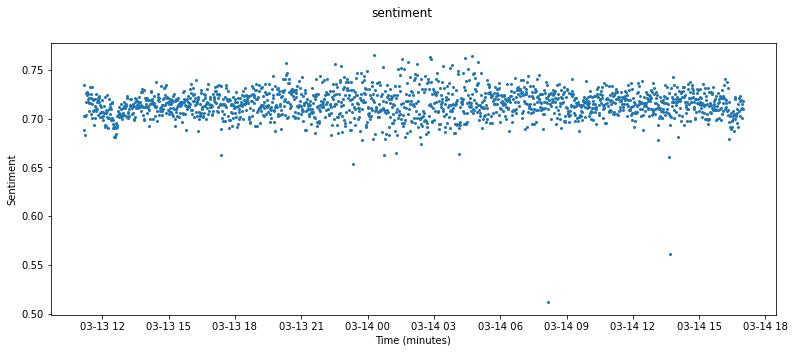

In [139]:
s_x_a, s_y_a = plotSentiments(oldDf[oldDf['Sentiment'] > 0.5], 'sentiment')

In [152]:
min(s_x_a)

datetime.datetime(2020, 3, 13, 11, 9)

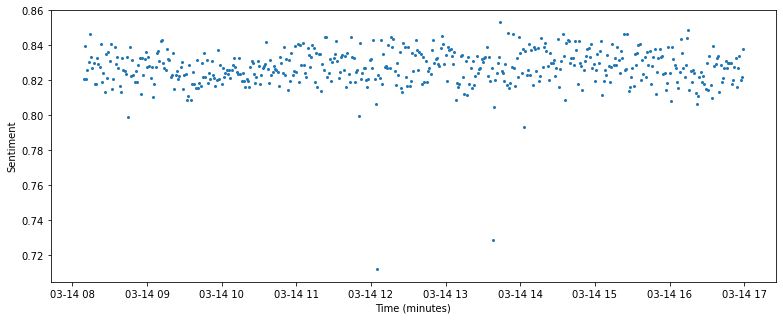

([datetime.datetime(2020, 3, 14, 16, 59),
  datetime.datetime(2020, 3, 14, 16, 58),
  datetime.datetime(2020, 3, 14, 16, 57),
  datetime.datetime(2020, 3, 14, 16, 56),
  datetime.datetime(2020, 3, 14, 16, 55),
  datetime.datetime(2020, 3, 14, 16, 54),
  datetime.datetime(2020, 3, 14, 16, 53),
  datetime.datetime(2020, 3, 14, 16, 52),
  datetime.datetime(2020, 3, 14, 16, 51),
  datetime.datetime(2020, 3, 14, 16, 50),
  datetime.datetime(2020, 3, 14, 16, 49),
  datetime.datetime(2020, 3, 14, 16, 48),
  datetime.datetime(2020, 3, 14, 16, 47),
  datetime.datetime(2020, 3, 14, 16, 46),
  datetime.datetime(2020, 3, 14, 16, 45),
  datetime.datetime(2020, 3, 14, 16, 44),
  datetime.datetime(2020, 3, 14, 16, 43),
  datetime.datetime(2020, 3, 14, 16, 42),
  datetime.datetime(2020, 3, 14, 16, 41),
  datetime.datetime(2020, 3, 14, 16, 40),
  datetime.datetime(2020, 3, 14, 16, 39),
  datetime.datetime(2020, 3, 14, 16, 38),
  datetime.datetime(2020, 3, 14, 16, 37),
  datetime.datetime(2020, 3, 14, 1

In [134]:
plotSentiments(oldDf[oldDf['Sentiment'] > 0.7])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcfa21d8d90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fce4e940710>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcda6e1c8d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcf79972c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcf51287a50>],
 'means': []}

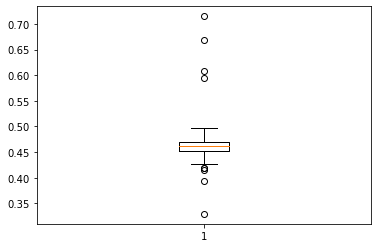

In [117]:
plt.boxplot(new_y)

In [156]:
briefing_df = pd.read_csv("../data/Processed_TrumpTweets_Coronavirus_briefing.csv", low_memory=False)

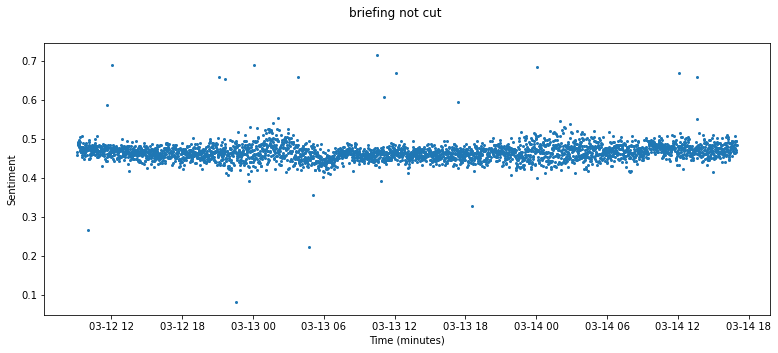

In [158]:
old_x, old_y = plotSentiments(briefing_df, 'briefing not cut')

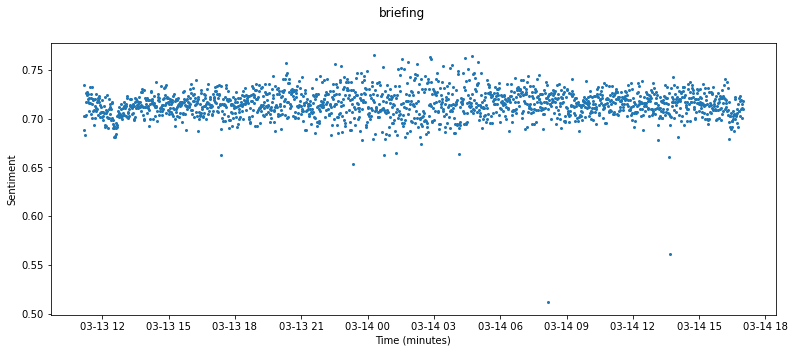

In [157]:
x,y = plotSentiments(briefing_df[briefing_df['Sentiment'] > 0.5], 'briefing')

In [251]:
x

[datetime.datetime(2020, 3, 14, 16, 59),
 datetime.datetime(2020, 3, 14, 16, 58),
 datetime.datetime(2020, 3, 14, 16, 57),
 datetime.datetime(2020, 3, 14, 16, 56),
 datetime.datetime(2020, 3, 14, 16, 55),
 datetime.datetime(2020, 3, 14, 16, 54),
 datetime.datetime(2020, 3, 14, 16, 53),
 datetime.datetime(2020, 3, 14, 16, 52),
 datetime.datetime(2020, 3, 14, 16, 51),
 datetime.datetime(2020, 3, 14, 16, 50),
 datetime.datetime(2020, 3, 14, 16, 49),
 datetime.datetime(2020, 3, 14, 16, 48),
 datetime.datetime(2020, 3, 14, 16, 47),
 datetime.datetime(2020, 3, 14, 16, 46),
 datetime.datetime(2020, 3, 14, 16, 45),
 datetime.datetime(2020, 3, 14, 16, 44),
 datetime.datetime(2020, 3, 14, 16, 43),
 datetime.datetime(2020, 3, 14, 16, 42),
 datetime.datetime(2020, 3, 14, 16, 41),
 datetime.datetime(2020, 3, 14, 16, 40),
 datetime.datetime(2020, 3, 14, 16, 39),
 datetime.datetime(2020, 3, 14, 16, 38),
 datetime.datetime(2020, 3, 14, 16, 37),
 datetime.datetime(2020, 3, 14, 16, 36),
 datetime.dateti

In [163]:
len(y)

1791

In [210]:
variances_2 = []
sents = oldDf['Sentiment']
for i in range(int(len(sents)/1000)):
    variances_2.append(np.var(sents[i:((i+1)*1000)]))

In [199]:
np.flip(np.array(variances))

array([0.05869941, 0.05869783, 0.05869706, ..., 0.06677829, 0.07146857,
       0.07330766])

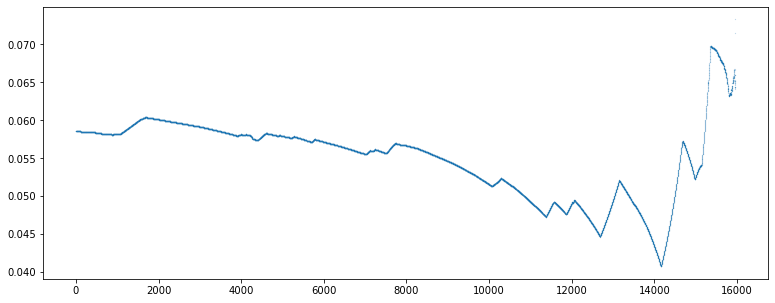

In [214]:
plt.figure(figsize=(13, 5))
plt.plot(np.flip(np.array(variances))[1700:], 'o', markersize = 0.1)

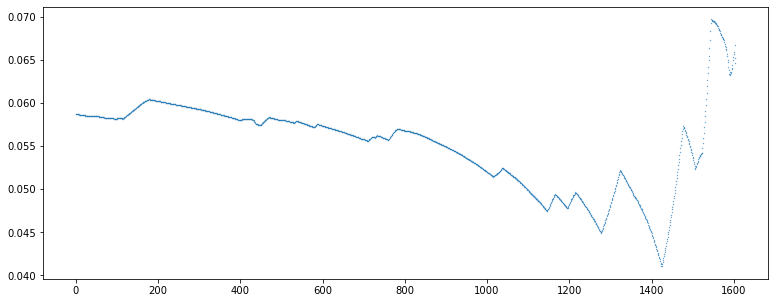

In [212]:
plt.figure(figsize=(13, 5))
plt.plot(np.flip(np.array(variances_2)), 'o', markersize = 0.3)

In [201]:
oldDf.iloc[14000]

Unnamed: 0                                                     14000
Unnamed: 0.1                                                   14000
id                                               1238969804880519170
conversation_id                                  1238582557689683968
created_at                                   2020-03-14 16:26:35 PDT
date                                                      2020-03-14
time                                                        16:26:35
timezone                                                      -800.0
user_id                                         819262898782556160.0
username                                                    maddrenh
name                                                          Madman
Sentiment                                                   0.689217
place                                                            NaN
tweet              @SenSherrodBrown And we are all paying for Tru...
language                          

In [159]:
def plotSentimentVariance(new_frame, title = ""):
    times = []
    for i in range(len(new_frame)):
        try:
            date_time_str = new_frame['date'][i] + ' ' + new_frame['time'][i][:5]
            date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M')
            times.append([date_time_obj, new_frame['Sentiment'][i]])
        except:
            continue
    sentiment_map = {}
    counts_map = {}
    for time, sentiment in times:
        if time in counts_map:
            counts_map[time] += 1
            sentiment_map[time].append(sentiment)
        else:
            counts_map[time] = 1
            sentiment_map[time] = [sentiment]
    x = []
    y = []
    for key in counts_map:
        x.append(key)
        y.append(np.var(sentiment_map[key]))

    plt.figure(figsize=(13, 5))
    plt.plot(x, y, 'o', markersize=2)
    plt.suptitle(title)
    plt.ylabel("Sentiment")
    plt.xlabel("Time (minutes)")
    plt.show()
    return (x,y)
    

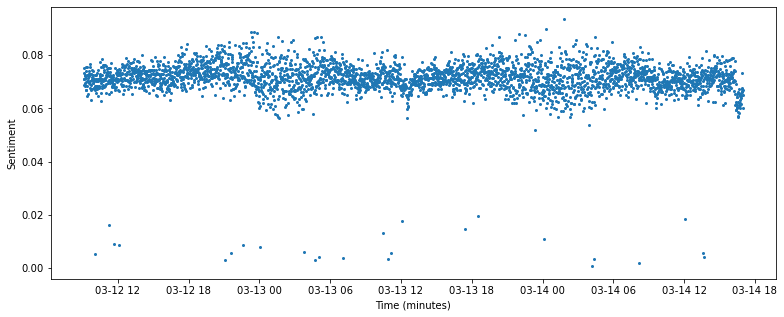

([datetime.datetime(2020, 3, 14, 16, 59),
  datetime.datetime(2020, 3, 14, 16, 58),
  datetime.datetime(2020, 3, 14, 16, 57),
  datetime.datetime(2020, 3, 14, 16, 56),
  datetime.datetime(2020, 3, 14, 16, 55),
  datetime.datetime(2020, 3, 14, 16, 54),
  datetime.datetime(2020, 3, 14, 16, 53),
  datetime.datetime(2020, 3, 14, 16, 52),
  datetime.datetime(2020, 3, 14, 16, 51),
  datetime.datetime(2020, 3, 14, 16, 50),
  datetime.datetime(2020, 3, 14, 16, 49),
  datetime.datetime(2020, 3, 14, 16, 48),
  datetime.datetime(2020, 3, 14, 16, 47),
  datetime.datetime(2020, 3, 14, 16, 46),
  datetime.datetime(2020, 3, 14, 16, 45),
  datetime.datetime(2020, 3, 14, 16, 44),
  datetime.datetime(2020, 3, 14, 16, 43),
  datetime.datetime(2020, 3, 14, 16, 42),
  datetime.datetime(2020, 3, 14, 16, 41),
  datetime.datetime(2020, 3, 14, 16, 40),
  datetime.datetime(2020, 3, 14, 16, 39),
  datetime.datetime(2020, 3, 14, 16, 38),
  datetime.datetime(2020, 3, 14, 16, 37),
  datetime.datetime(2020, 3, 14, 1

In [160]:
plotSentimentVariance(briefing_df)

In [ ]:
np.var(briefing_df[briefing_df['date'] == '03'])

In [27]:
new_x = []
new_y = []
for i in range(len(x)):
    if y[i] < 2500:
        new_x.append(x[i])
        new_y.append(y[i])

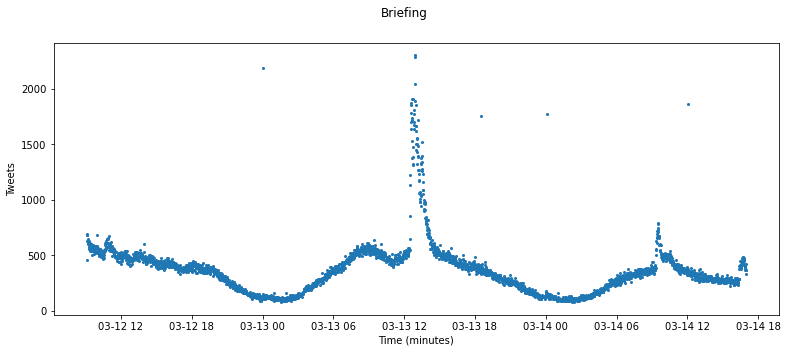

In [29]:
plt.figure(figsize=(13, 5))
plt.plot(np.array(new_x), np.array(new_y), 'o', markersize=2)
plt.suptitle("Briefing")
plt.ylabel("Tweets")
plt.xlabel("Time (minutes)")
plt.show()

In [38]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'conversation_id', 'created_at',
       'date', 'time', 'timezone', 'user_id', 'username', 'name', 'Sentiment',
       'place', 'tweet', 'language', 'mentions', 'urls', 'photos',
       'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'quote_url', 'video', 'thumbnail',
       'user_rt_id', 'reply_to'],
      dtype='object')

In [218]:
x

[datetime.datetime(2020, 3, 14, 16, 59),
 datetime.datetime(2020, 3, 14, 16, 58),
 datetime.datetime(2020, 3, 14, 16, 57),
 datetime.datetime(2020, 3, 14, 16, 56),
 datetime.datetime(2020, 3, 14, 16, 55),
 datetime.datetime(2020, 3, 14, 16, 54),
 datetime.datetime(2020, 3, 14, 16, 53),
 datetime.datetime(2020, 3, 14, 16, 52),
 datetime.datetime(2020, 3, 14, 16, 51),
 datetime.datetime(2020, 3, 14, 16, 50),
 datetime.datetime(2020, 3, 14, 16, 49),
 datetime.datetime(2020, 3, 14, 16, 48),
 datetime.datetime(2020, 3, 14, 16, 47),
 datetime.datetime(2020, 3, 14, 16, 46),
 datetime.datetime(2020, 3, 14, 16, 45),
 datetime.datetime(2020, 3, 14, 16, 44),
 datetime.datetime(2020, 3, 14, 16, 43),
 datetime.datetime(2020, 3, 14, 16, 42),
 datetime.datetime(2020, 3, 14, 16, 41),
 datetime.datetime(2020, 3, 14, 16, 40),
 datetime.datetime(2020, 3, 14, 16, 39),
 datetime.datetime(2020, 3, 14, 16, 38),
 datetime.datetime(2020, 3, 14, 16, 37),
 datetime.datetime(2020, 3, 14, 16, 36),
 datetime.dateti

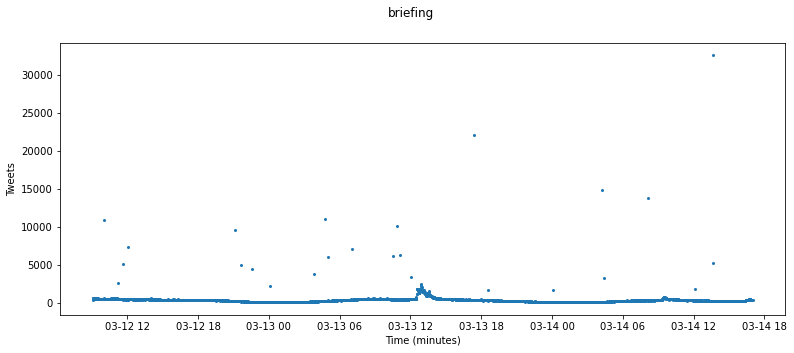

In [220]:
x,y = plotTimes(oldDf, 'briefing')

In [240]:
outliers = removeOutliers(y)

In [239]:
def removeOutliers(an_array):
    mean = np.mean(an_array)
    standard_deviation = np.std(an_array)
    distance_from_mean = abs(an_array - mean)
    max_deviations = 2
    not_outlier = distance_from_mean < max_deviations * standard_deviation
    return not_outlier

/Users/trevorcarpenter/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (0,1,2,3,4,5,8,9,10,11,12,13,14,15,16,20,21,22,23,24,26,27) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


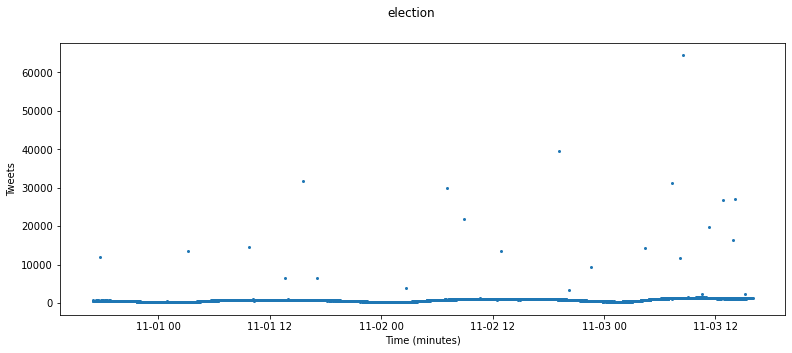

In [254]:
df_election = pd.read_csv("../data/Processed_Trump_Tweets_Election.csv")
x_e,y_e = plotTimes(df_election, 'election')

In [258]:
new_x_e = []
new_y_e = []
for i in range(len(x_e)):
    if y_e[i] < 2000:
        new_x_e.append(x_e[i])
        new_y_e.append(y_e[i])
        

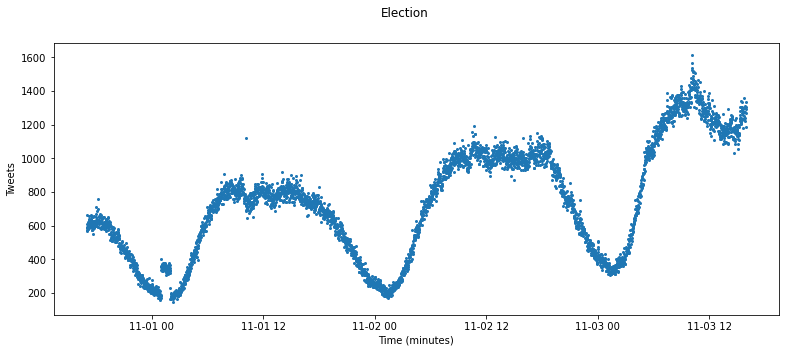

In [259]:
plt.figure(figsize=(13, 5))
plt.plot(np.array(new_x_e), np.array(new_y_e), 'o', markersize=2)
plt.suptitle("Election")
plt.ylabel("Tweets")
plt.xlabel("Time (minutes)")
plt.show()

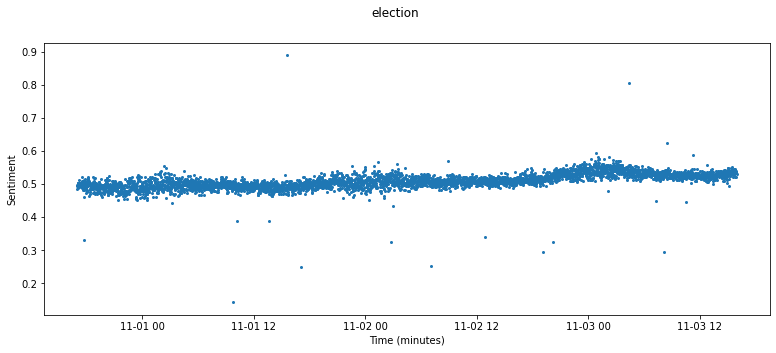

In [265]:
a,b = plotSentiments(df_election, 'election')

In [269]:
new_a = []
new_b = []
for i in range(len(a)):
    if b[i] > 0.4 and b[i] < 0.6:
        new_a.append(a[i])
        new_b.append(b[i])

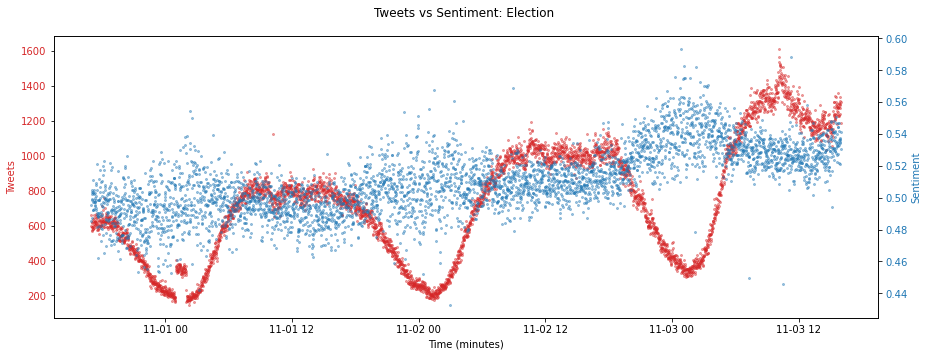

In [277]:

fig, ax1 = plt.subplots(figsize = (13,5))

color = 'tab:red'
ax1.set_xlabel("Time (minutes)")
ax1.set_ylabel('Tweets', color=color)
ax1.plot(np.array(new_x_e), np.array(new_y_e), 'o', color = color,  markersize=2, alpha = 0.4)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Sentiment', color=color)  # we already handled the x-label with ax1
ax2.plot(np.array(new_a), np.array(new_b), 'o', color = color,  markersize=2, alpha = 0.4)
ax2.tick_params(axis='y', labelcolor=color)

plt.suptitle('Tweets vs Sentiment: Election')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [294]:
from sklearn import linear_model
from sklearn.metrics import r2_score
lm = linear_model.LinearRegression()
model = lm.fit(np.array(range(len(new_y_e))).reshape(-1,1),np.array(np.flip(new_y_e)))

In [297]:
model.score(np.array(range(len(new_y_e))).reshape(-1,1),np.array(np.flip(new_y_e))) 

0.36207145551337405

In [287]:
model2 = linear_model.LinearRegression().fit(np.array(range(len(new_b))).reshape(-1,1),np.array(np.flip(new_b)))

In [293]:
model2.score(np.array(range(len(new_b))).reshape(-1,1),np.array(np.flip(new_b)))

0.4949282022465915

In [289]:
model2.coef_*2000

array([0.0231359])

In [291]:
np.correlate(new_b, new_y_e)

array([1595245.21698665, 1595170.44565469, 1595106.02861112,
       1595110.51010743, 1595075.69688716, 1595085.68007819,
       1595060.7518399 , 1595001.79137001, 1595060.65667762,
       1594981.55464529])

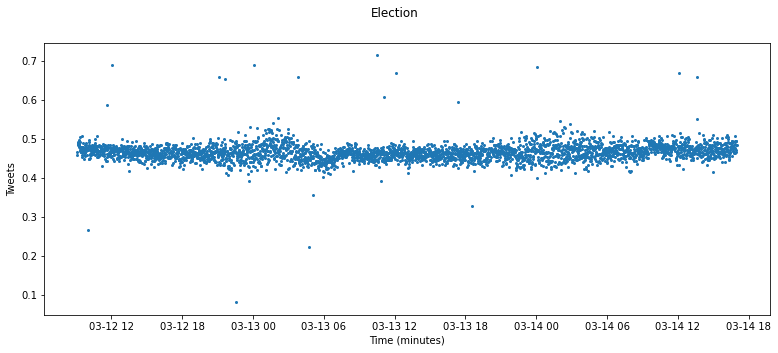

In [298]:
plt.figure(figsize=(13, 5))
plt.plot(np.array(s_x), np.array(s_y), 'o', markersize=2)
plt.suptitle("Election")
plt.ylabel("Tweets")
plt.xlabel("Time (minutes)")
plt.show()

In [302]:
new_sx = []
new_sy = []
for i in range(len(s_x)):
    if s_y[i] > 0.35 and s_y[i] < 0.55:
        new_sx.append(s_x[i])
        new_sy.append(s_y[i])

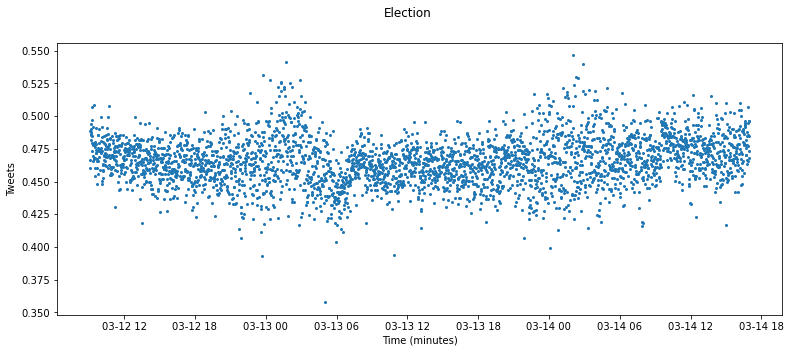

In [303]:
plt.figure(figsize=(13, 5))
plt.plot(np.array(new_sx), np.array(new_sy), 'o', markersize=2)
plt.suptitle("Election")
plt.ylabel("Tweets")
plt.xlabel("Time (minutes)")
plt.show()

In [306]:
new_x = []
new_y = []
for i in range(len(x)):
    if y[i] < 2000:
        new_x.append(x[i])
        new_y.append(y[i])

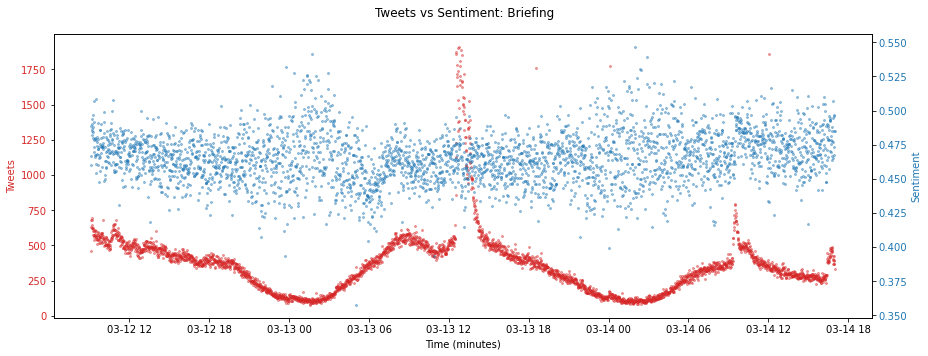

In [309]:

fig, ax1 = plt.subplots(figsize = (13,5))

color = 'tab:red'
ax1.set_xlabel("Time (minutes)")
ax1.set_ylabel('Tweets', color=color)
ax1.plot(np.array(new_x), np.array(new_y), 'o', color = color,  markersize=2, alpha = 0.4)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Sentiment', color=color)  # we already handled the x-label with ax1
ax2.plot(np.array(new_sx), np.array(new_sy), 'o', color = color,  markersize=2, alpha = 0.4)
ax2.tick_params(axis='y', labelcolor=color)

plt.suptitle('Tweets vs Sentiment: Briefing')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()